# Hypothyroid Disease Prediction Using Random Foreset and SVM Classifiers

## Business and Problem Understanding

### Background

Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. Use the healthcare datasets provided to accomplish the following

### Requirement
Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.


### Features

1. Age
2. Sex
3. on_thyroxine
4. query_on_thyroxine
5. on_antithyroid_medicationthyroid_surgery
6. query_hypothyroid
7. query_hyperthyroid
8. pregnant
9. sick
10. tumor
11. lithium
12. goitre
13. TSH_measured
14. TSH
15. T3_measured
16. T3
17. TT4_measured
18. TT4

### Metric for success
1. Model Accuracy
2. Simplicity

## Libraries and Data Importation

In [93]:
## Import Libraries
# Data Manipulation libraries
import pandas as pd
import numpy as np
import math
from scipy import stats
pd.set_option('display.float_format', lambda x: '%.3f' % x) #Suppress scientific notation

# Visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline 
# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina' 
import seaborn as sns
#Improving the appearance of graphs
sns.set(rc={'figure.figsize':(10, 8)})

# One label encoding library
from sklearn import preprocessing 

# Modelling library
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, r2_score,mean_absolute_error, mean_squared_error
import scipy.stats as stats
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC

import warnings
warnings.filterwarnings("ignore")

In [91]:
# Import Dataset
df = pd.read_csv('hypothyroid.csv')

## Data Exploration

In [92]:
# Check Sample Dataset: Objective: Understanding of data columns
df.sample(5)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
2257,negative,71,M,f,f,f,f,f,f,f,...,y,1.90,y,92,y,0.99,y,93,n,?
2789,negative,70,F,f,f,f,f,t,f,f,...,y,1.80,y,124,y,1.11,y,112,n,?
1892,negative,79,F,f,f,f,f,f,f,f,...,y,0.90,y,102,y,0.95,y,107,n,?
386,negative,57,M,t,f,f,f,f,f,f,...,y,4.50,y,159,y,1.04,y,153,n,?
2673,negative,70,F,f,f,f,f,f,f,f,...,y,2.30,y,180,y,1.30,y,139,n,?


In [14]:
# Check number of columns and rows
df.shape

(3163, 26)

Notes: There are 3163 records and 26 columns

In [15]:
# Check Columns and their data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
status                       3163 non-null object
age                          3163 non-null object
sex                          3163 non-null object
on_thyroxine                 3163 non-null object
query_on_thyroxine           3163 non-null object
on_antithyroid_medication    3163 non-null object
thyroid_surgery              3163 non-null object
query_hypothyroid            3163 non-null object
query_hyperthyroid           3163 non-null object
pregnant                     3163 non-null object
sick                         3163 non-null object
tumor                        3163 non-null object
lithium                      3163 non-null object
goitre                       3163 non-null object
TSH_measured                 3163 non-null object
TSH                          3163 non-null object
T3_measured                  3163 non-null object
T3                           3163 non-null 

All columns are of numeric of type object. Conversion to numeric required to enable modelling

#### Statistical Measures

In [16]:
#Check statistical summary of the dataset
df.describe(include ='all')

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163
unique,2,93,3,2,2,2,2,2,2,2,2,2,2,2,2,240,2,70,2,269,2,159,2,281,2,53
top,negative,?,F,f,f,f,f,f,f,f,f,f,f,f,y,0,y,?,y,?,y,?,y,?,n,?
freq,3012,446,2182,2702,3108,3121,3059,2922,2920,3100,3064,3123,3161,3064,2695,894,2468,695,2914,249,2915,248,2916,247,2903,2903


Maximum, minimum mean and standard deviation values of the features observed e.g minimum bedrooms are 0 and maximum is 33. 

In [17]:
#Most frequent values
df.mode()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,negative,?,F,f,f,f,f,f,f,f,f,f,f,f,y,0,y,?,y,?,y,?,y,?,n,?


#### Check Missing Values

In [0]:
#Null Values
df.isnull().sum()

No null values in the dataset noted

#### Count Categorical columns

In [0]:
#Floor Count
df_house['floors'].value_counts()

1.000    10680
2.000     8241
1.500     1910
3.000      613
2.500      161
3.500        8
Name: floors, dtype: int64

In [0]:
#Condition Count
df_house['condition'].value_counts()

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

In [0]:
#Floor Count
df_house['grade'].value_counts()

7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64

In [0]:
#View Count
print(df_house['view'].value_counts())

0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64


In [0]:
#Waterfront Count
print(df_house['waterfront'].value_counts())

0    21450
1      163
Name: waterfront, dtype: int64


#### Check Outliers

In [0]:
# Outliers
def plot_boxplots(target_dataframe,col_names):
    
    fig, ax = plt.subplots(len(col_names), figsize=(10,80))
    
    for i, column_name in enumerate(col_names):
        sns.boxplot(y=target_dataframe[column_name], ax=ax[i])
        ax[i].set_title('Box plot - {}'.format(column_name), fontsize=10)
        ax[i].set_xlabel(column_name, fontsize=8)
    
    plt.show()

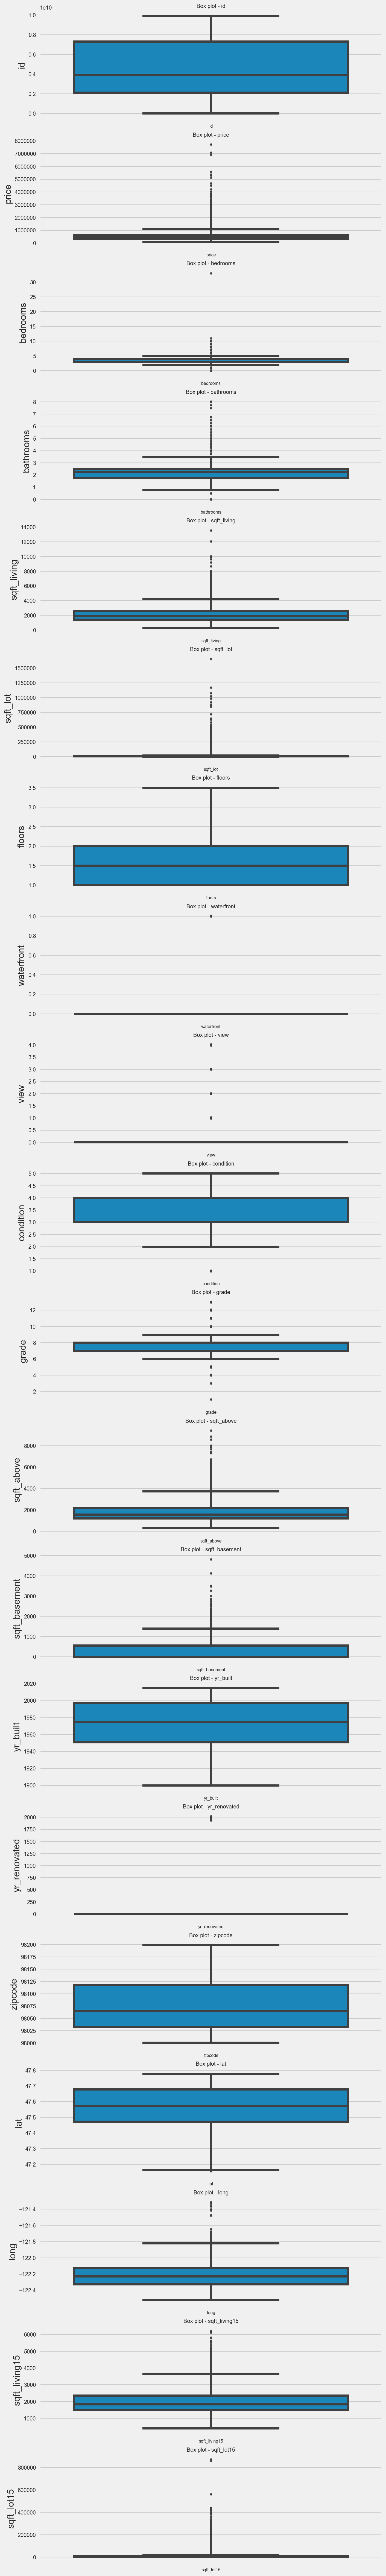

In [0]:
#Execute the function
col_names = df_house.columns
target_dataframe = df_house
plt.style.use('fivethirtyeight')
plot_boxplots(target_dataframe,col_names)

Price, bedrooms, bathrooms, sqft living, sqft lot, waterfront,view,grade, sqft_above, sqft_basement , yr_renovated, long, sqft_living15, sqft_lot15 all noted to have outliers.

The outliers will not be dropped as they are business related important data. However, the impact of outliers on the model to be analyzed.

## Data Analysis

### Univariate Analysis

In [19]:
# Variables Distributions
col_names = df_house.columns
fig, ax = plt.subplots(len(col_names), figsize=(15,100))
plt.style.use('fivethirtyeight')
for i, col_val in enumerate(col_names):

    sns.distplot(df_house[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Frequency distribution of '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()

NameError: ignored

From above distribution, price is not normally distributed. We are going to check the kurtosis and skewness further to confirm this.

In [0]:
# Target variable kurtosis and skewness
print("Price Kurtsosis ",round(df_house['price'].kurtosis(),2))
print('Price Skewness ',round(df_house['price'].skew(),2))

Price Kurtsosis  34.52
Price Skewness  4.02


Target variable price is normally imbalanced .
It has
1. Positively skewness
2. Shows peakedness

We are hence going to normalize this column

#### Normality Treatment of Price

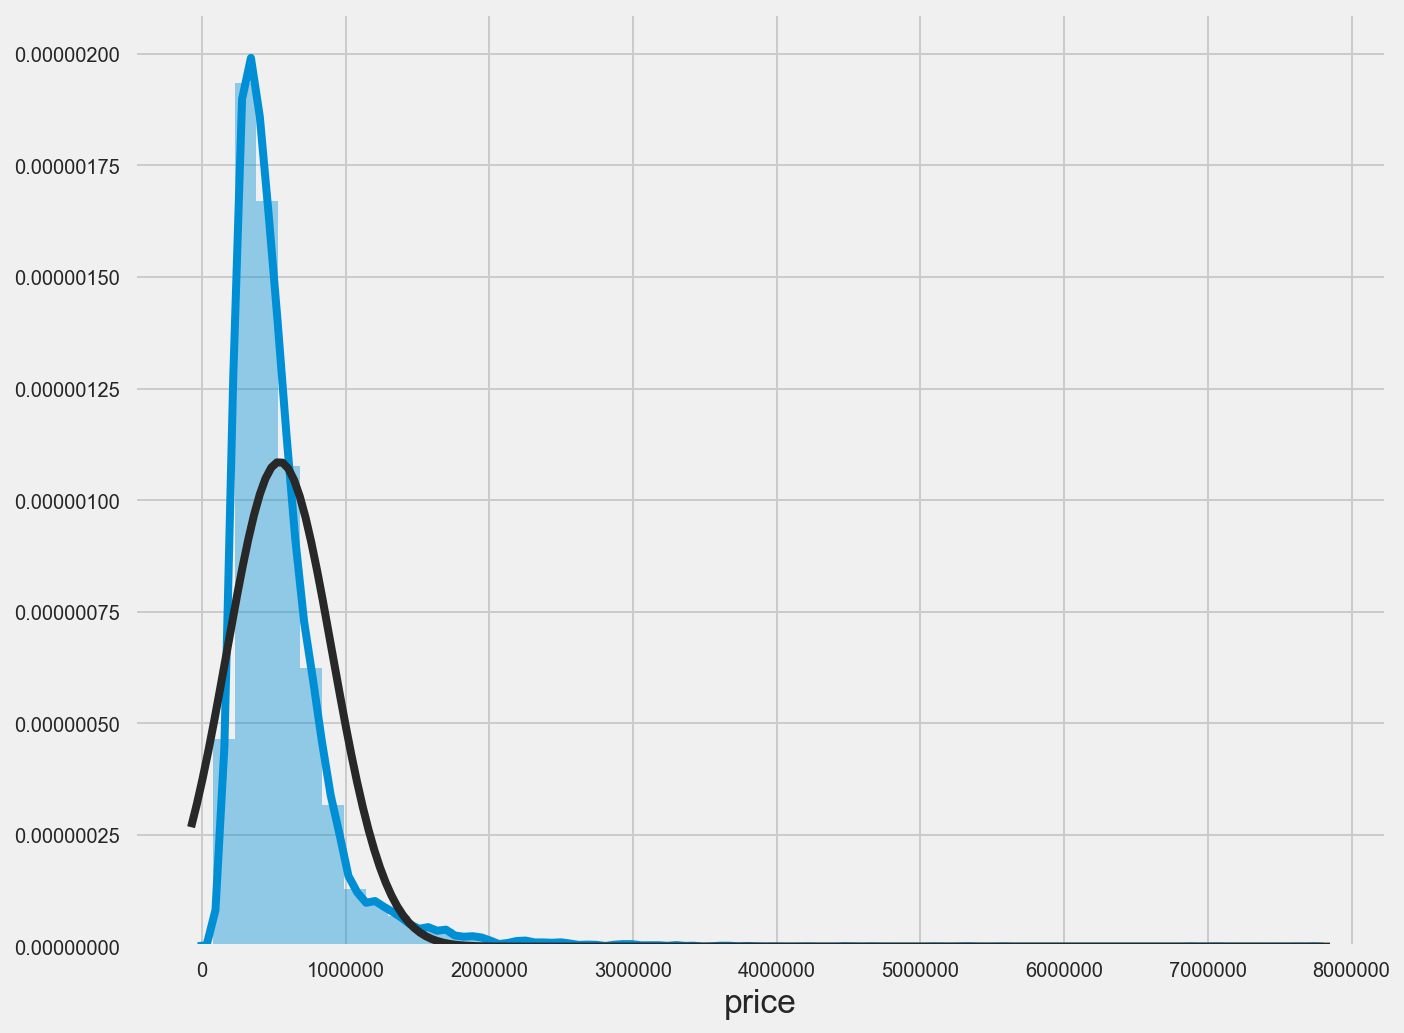

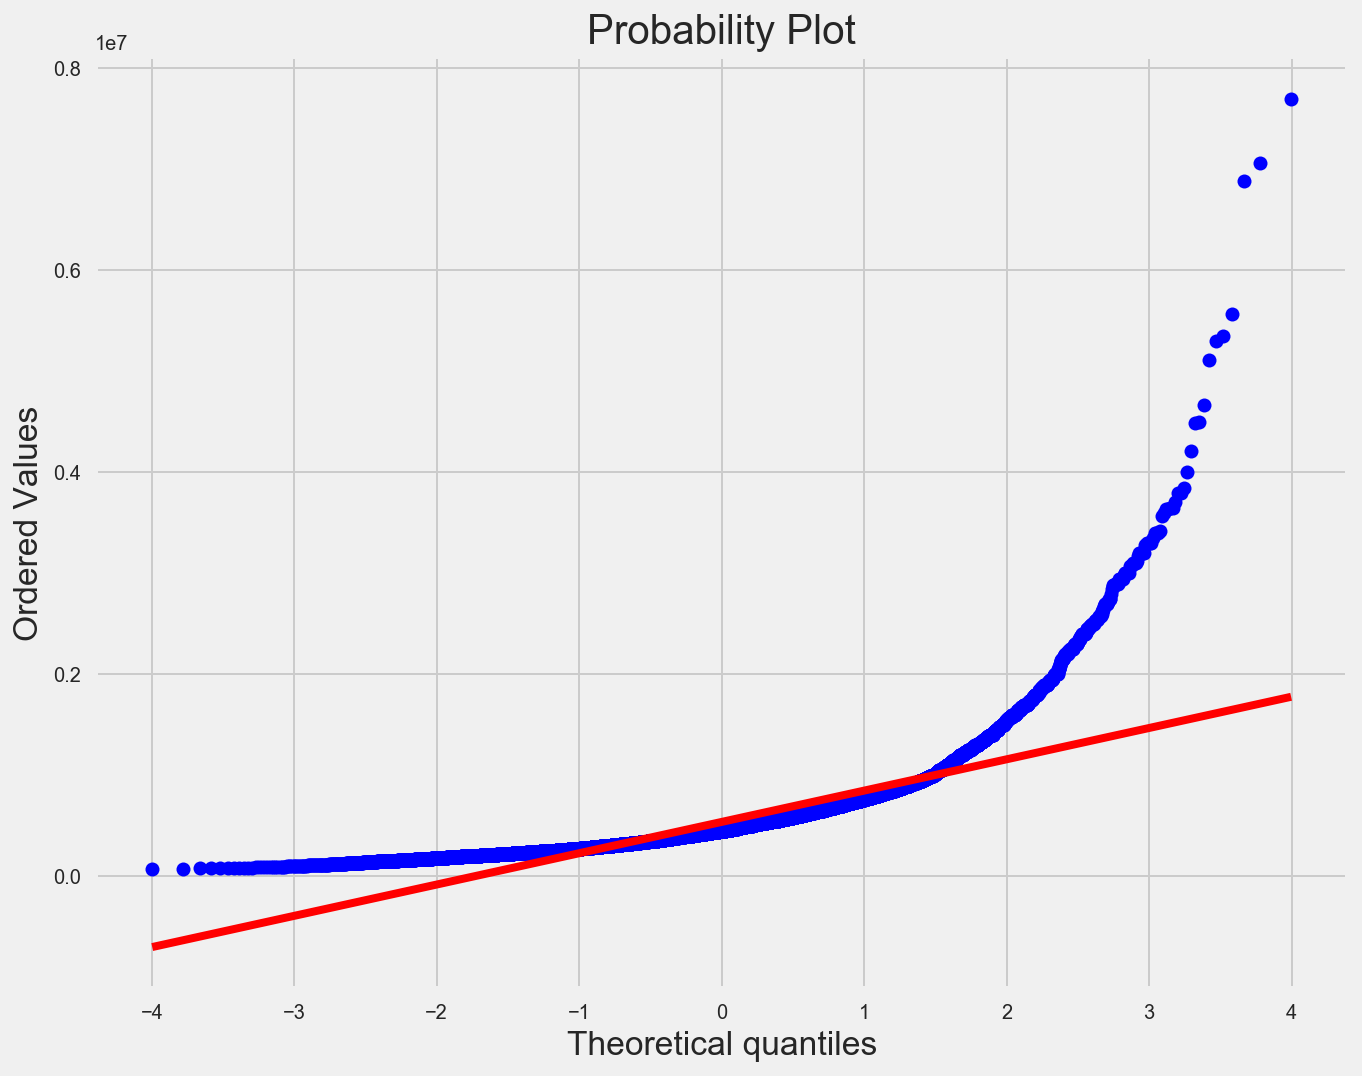

In [0]:
#Graphical Non observation of imbalanced price column
sns.distplot(df_house['price'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_house['price'], plot=plt)

#### Log transformation

In [0]:
#apply log transformation to price
df_house['price'] = np.log(df_house['price'])

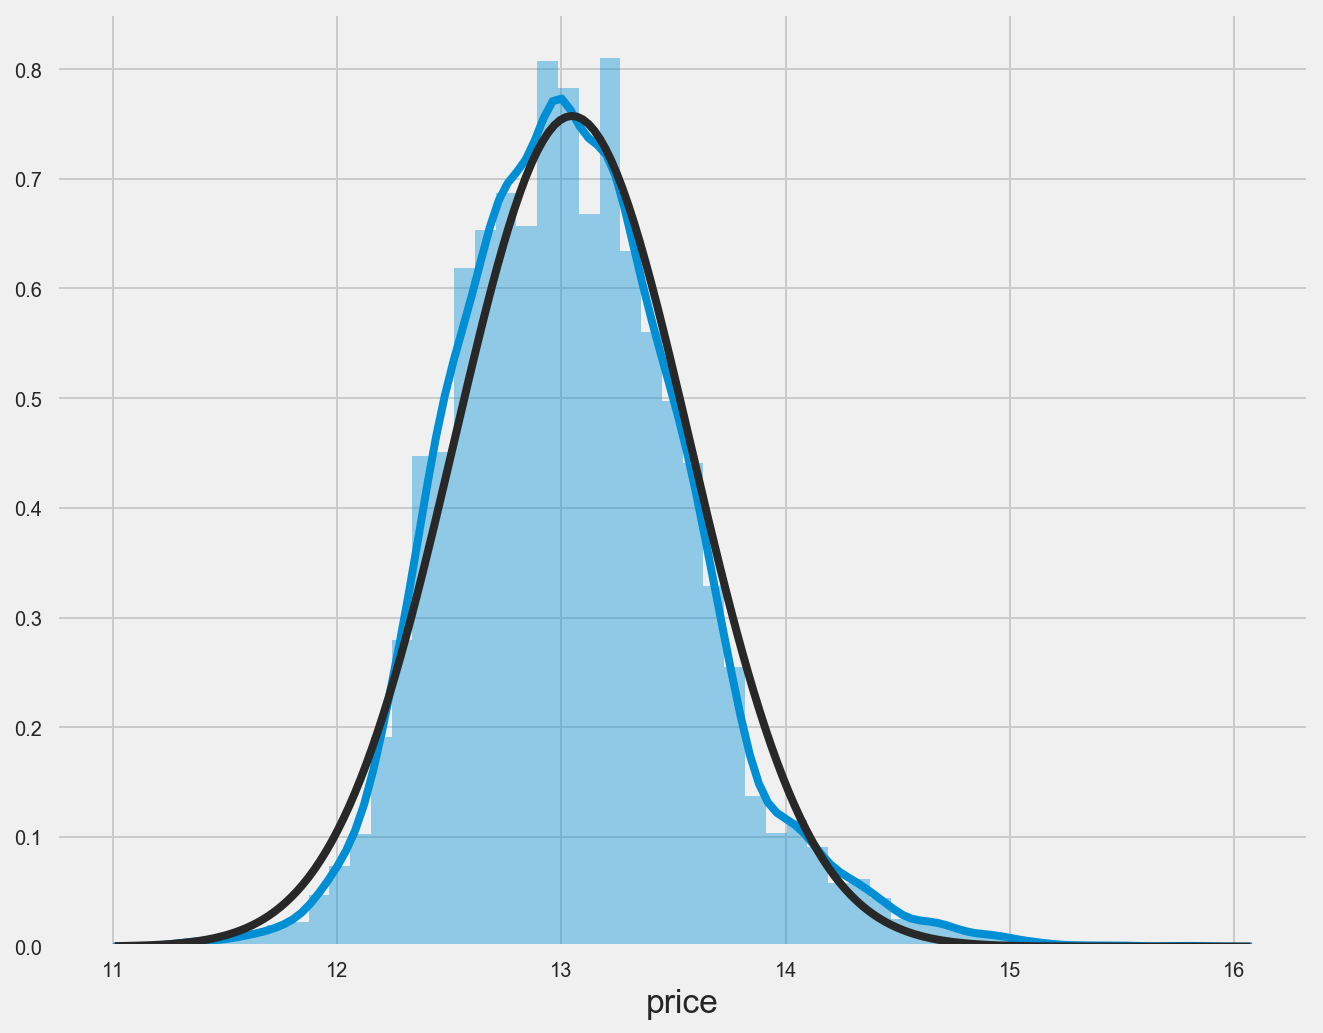

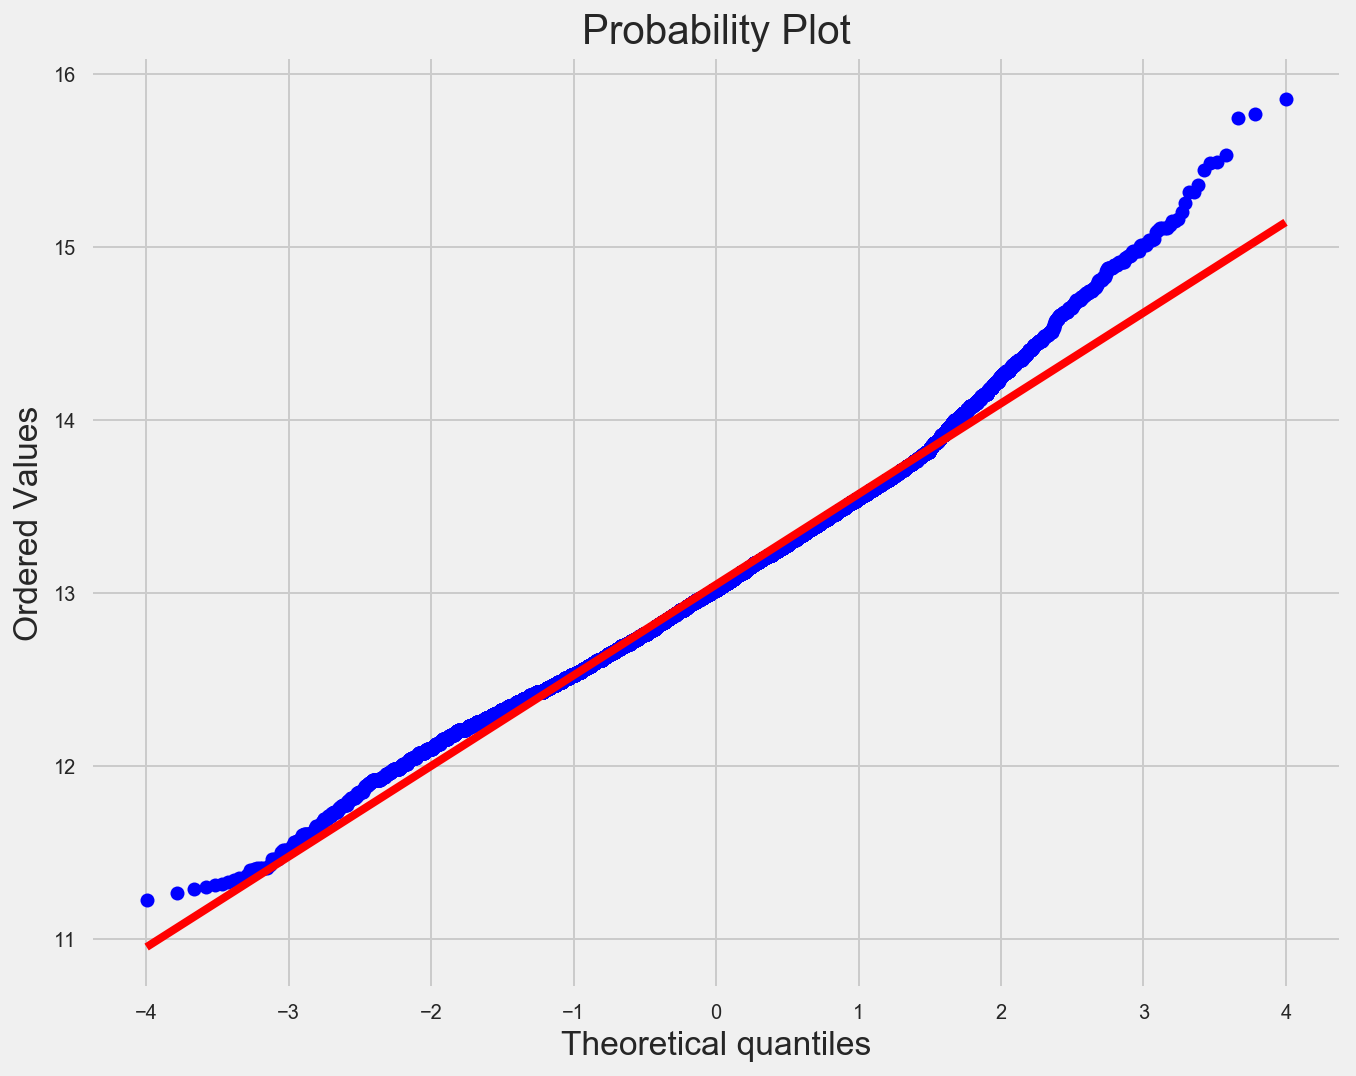

In [0]:
#Observe the results of transformation on a histogram and normal probability plot
sns.distplot(df_house['price'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_house['price'], plot=plt)

### Distribution of individual variables

#### a) Floor

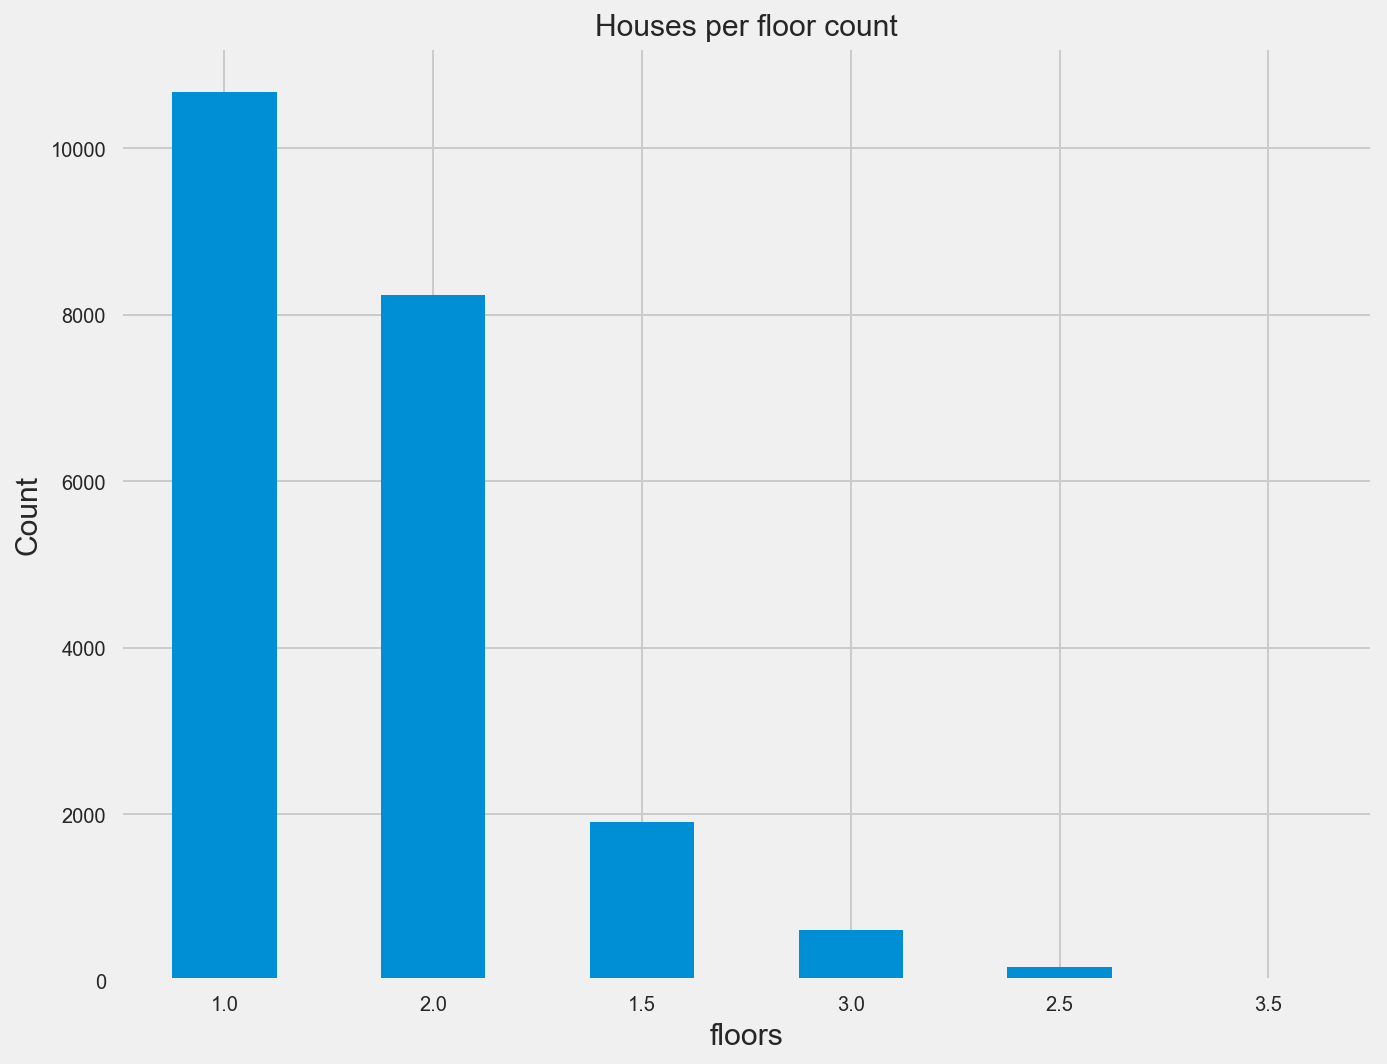

In [0]:
plt.style.use('fivethirtyeight')
df_house['floors'].value_counts().plot.bar(rot =0)
plt.xlabel("floors", fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.title("Houses per floor count",fontsize=15)
plt.show()

#### b) Houses per Condition

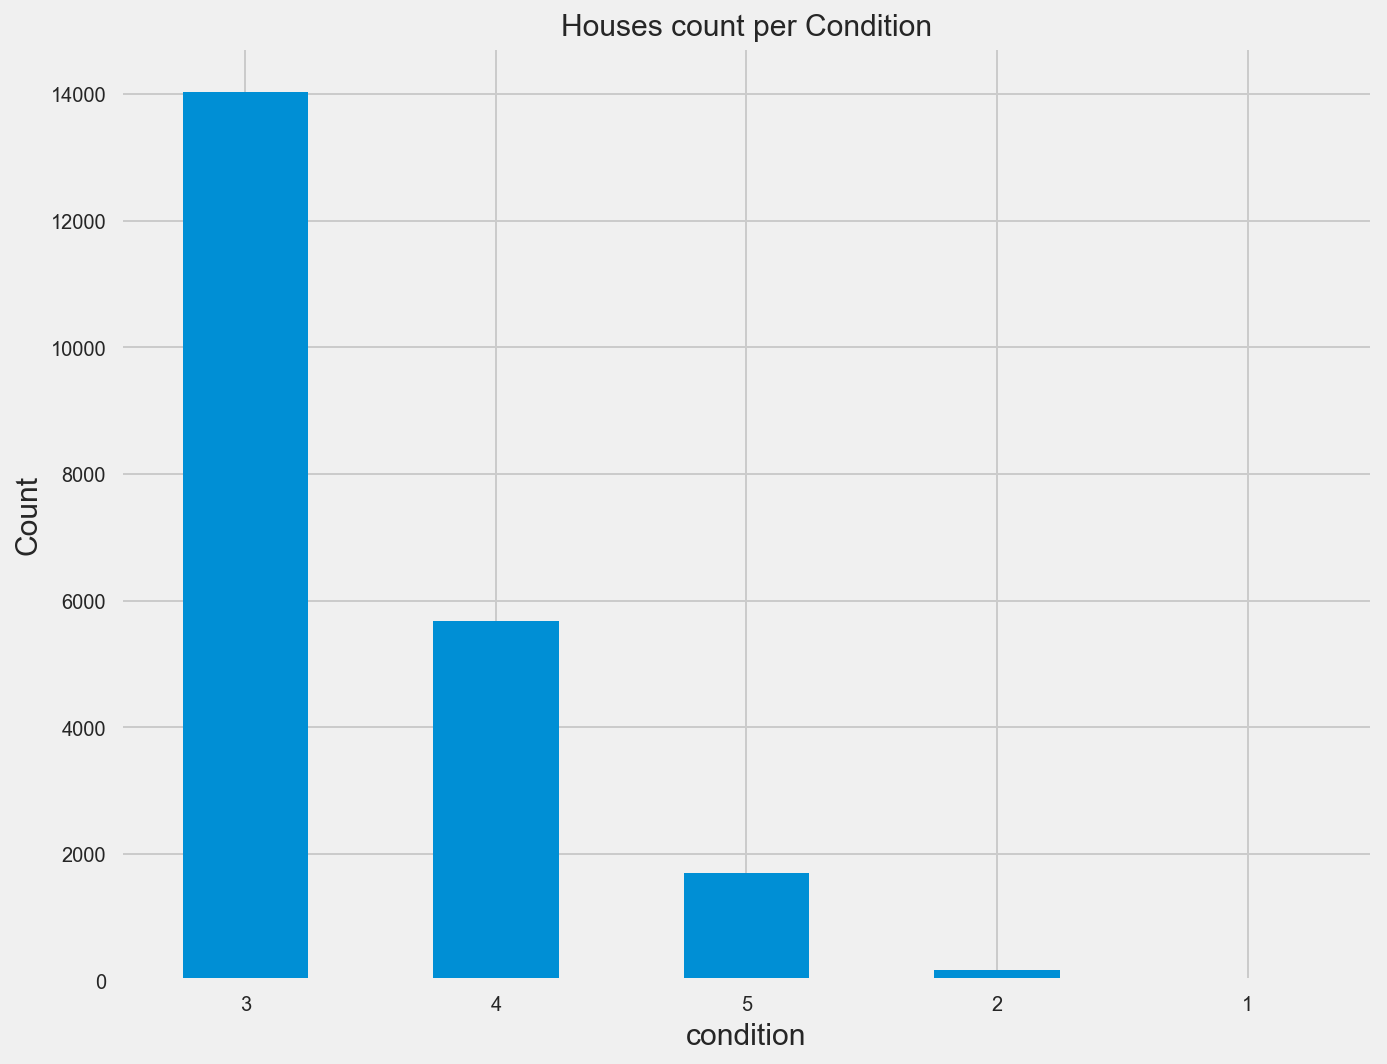

In [0]:
plt.style.use('fivethirtyeight')
df_house['condition'].value_counts().plot.bar(rot =0)
plt.xlabel("condition",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.title("Houses count per Condition",fontsize=15)
plt.show()

##### c) Grade

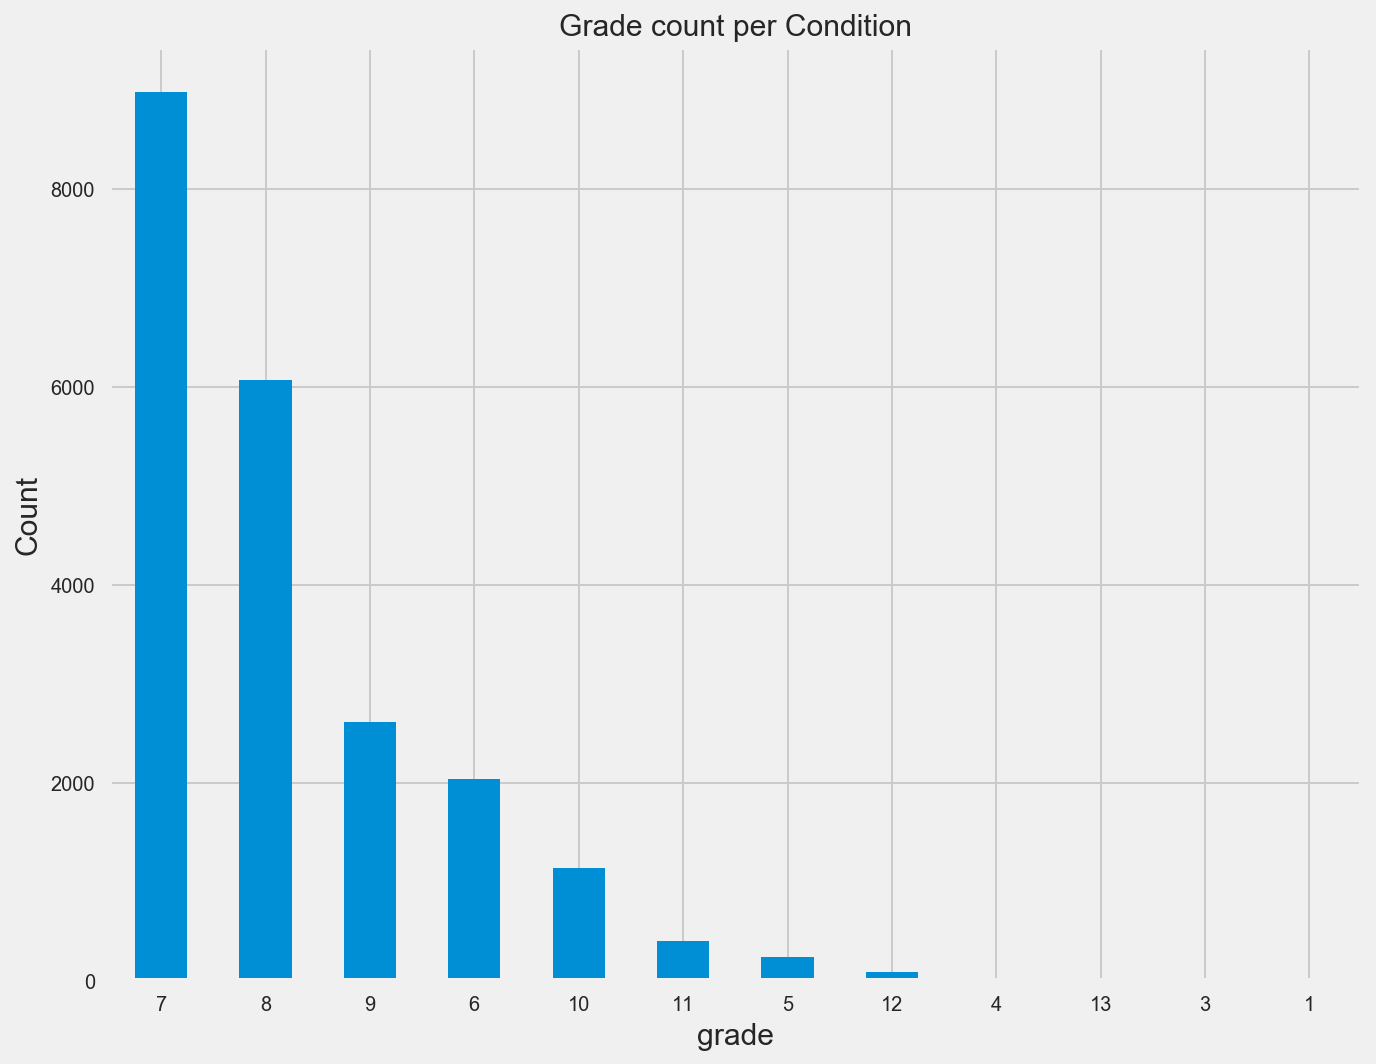

In [0]:
plt.style.use('fivethirtyeight')
df_house['grade'].value_counts().plot.bar(rot =0)
plt.xlabel("grade",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.title("Grade count per Condition",fontsize=15)
plt.show()

#### d) Identify columns with high percentage of zeroes. Drop columns with high zero values

In [0]:
for i,x in enumerate(df_house.columns):
    print(x, df_house[df_house[x]==0].yr_renovated.count()/df_house[x].count()*100)

id 0.0
price 0.0
bedrooms 0.0601489844075325
bathrooms 0.046268449544255776
sqft_living 0.0
sqft_lot 0.0
floors 0.0
waterfront 99.24582427242864
view 90.17258131680008
condition 0.0
grade 0.0
sqft_above 0.0
sqft_basement 60.73196687179012
yr_built 0.0
yr_renovated 95.77106371165502
zipcode 0.0
lat 0.0
long 0.0
sqft_living15 0.0
sqft_lot15 0.0


Observations
1. 99 percent of houses do not have a waterfront
2. 95% of houses do not have year renovated value.
Above columns are have high percentage of entries with 0 value. Review their usage during model. Can be removed as independent variables.

### Bi-Variate Analysis

a) Bedrooms against Price

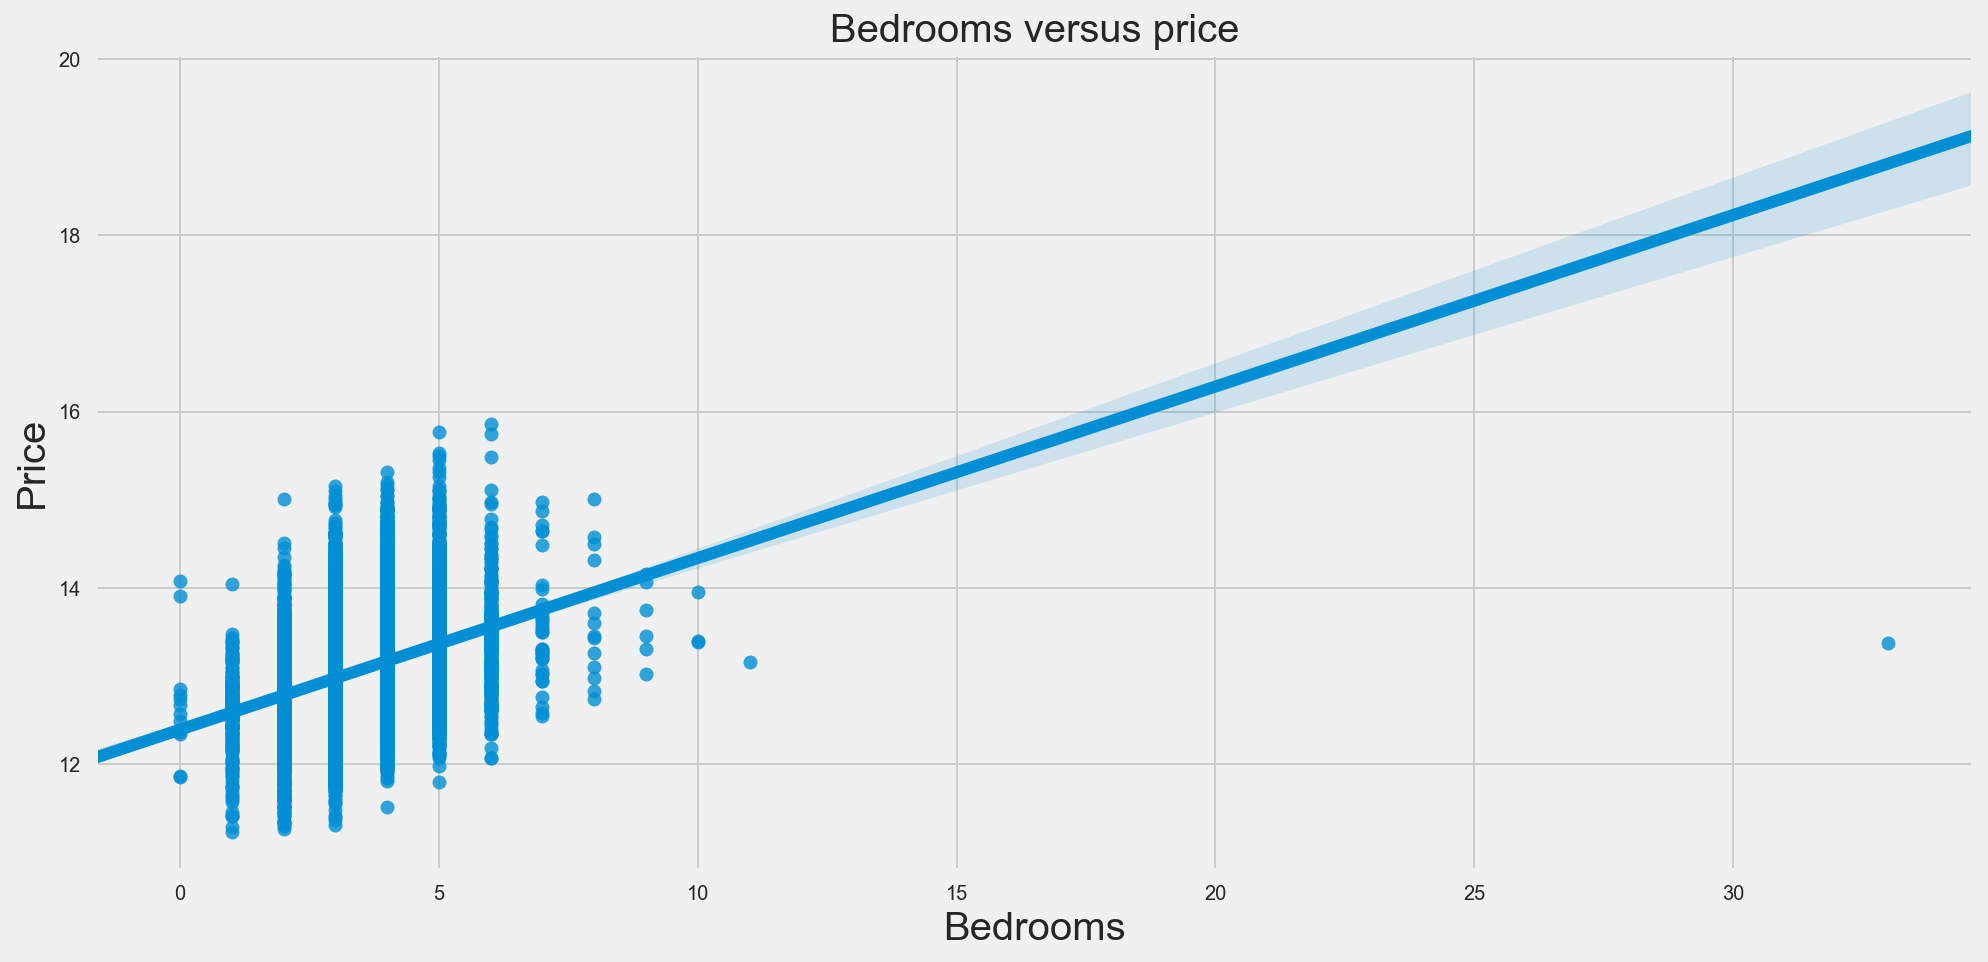

In [0]:
#Scatter plot to check for any correlation between bedrooms and price
plt.style.use('fivethirtyeight')
plt.figure(figsize = (15,7))
sns.regplot(df_house['bedrooms'],df_house['price'])
plt.ylabel('Price',fontsize = 20)
plt.xlabel('Bedrooms',fontsize = 20)
plt.title('Bedrooms versus price',fontsize = 20)
plt.show()

Increase in rooms largely result to increase in price. 
However, from eight bedrroms and above, the price increase is not noted. Outlier exist at about 34 bedrooms.

b) Condition against Price

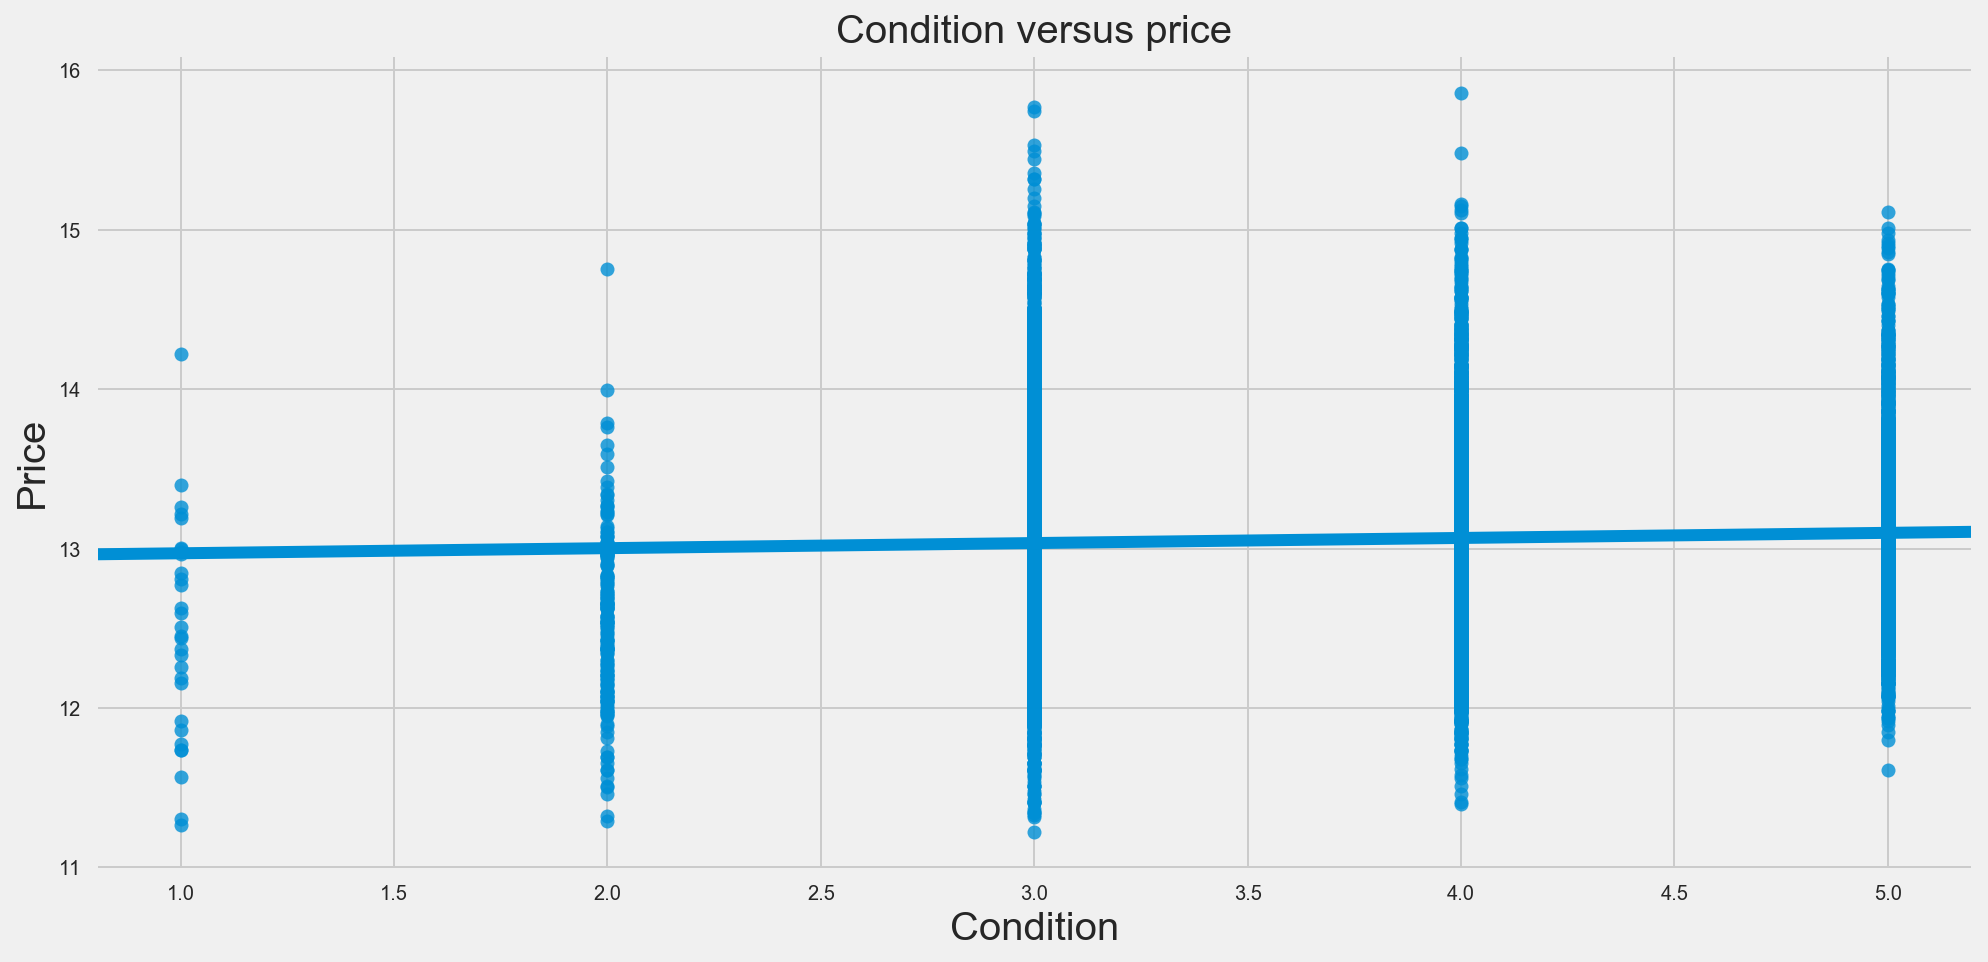

In [0]:
#Scatter plot to check for any correlation between House Condition and Price
plt.style.use('fivethirtyeight')
plt.figure(figsize = (15,7))
sns.regplot(df_house['condition'],df_house['price'])
plt.ylabel('Price',fontsize = 20)
plt.xlabel('Condition',fontsize = 20)
plt.title('Condition versus price',fontsize = 20)
plt.show()

Houses with higher condition have higher prices. The meaning of condition is not provided in dataset but from above pattern, we can infer that 5 is best condition and 1 is poor.

c) Condition against grade

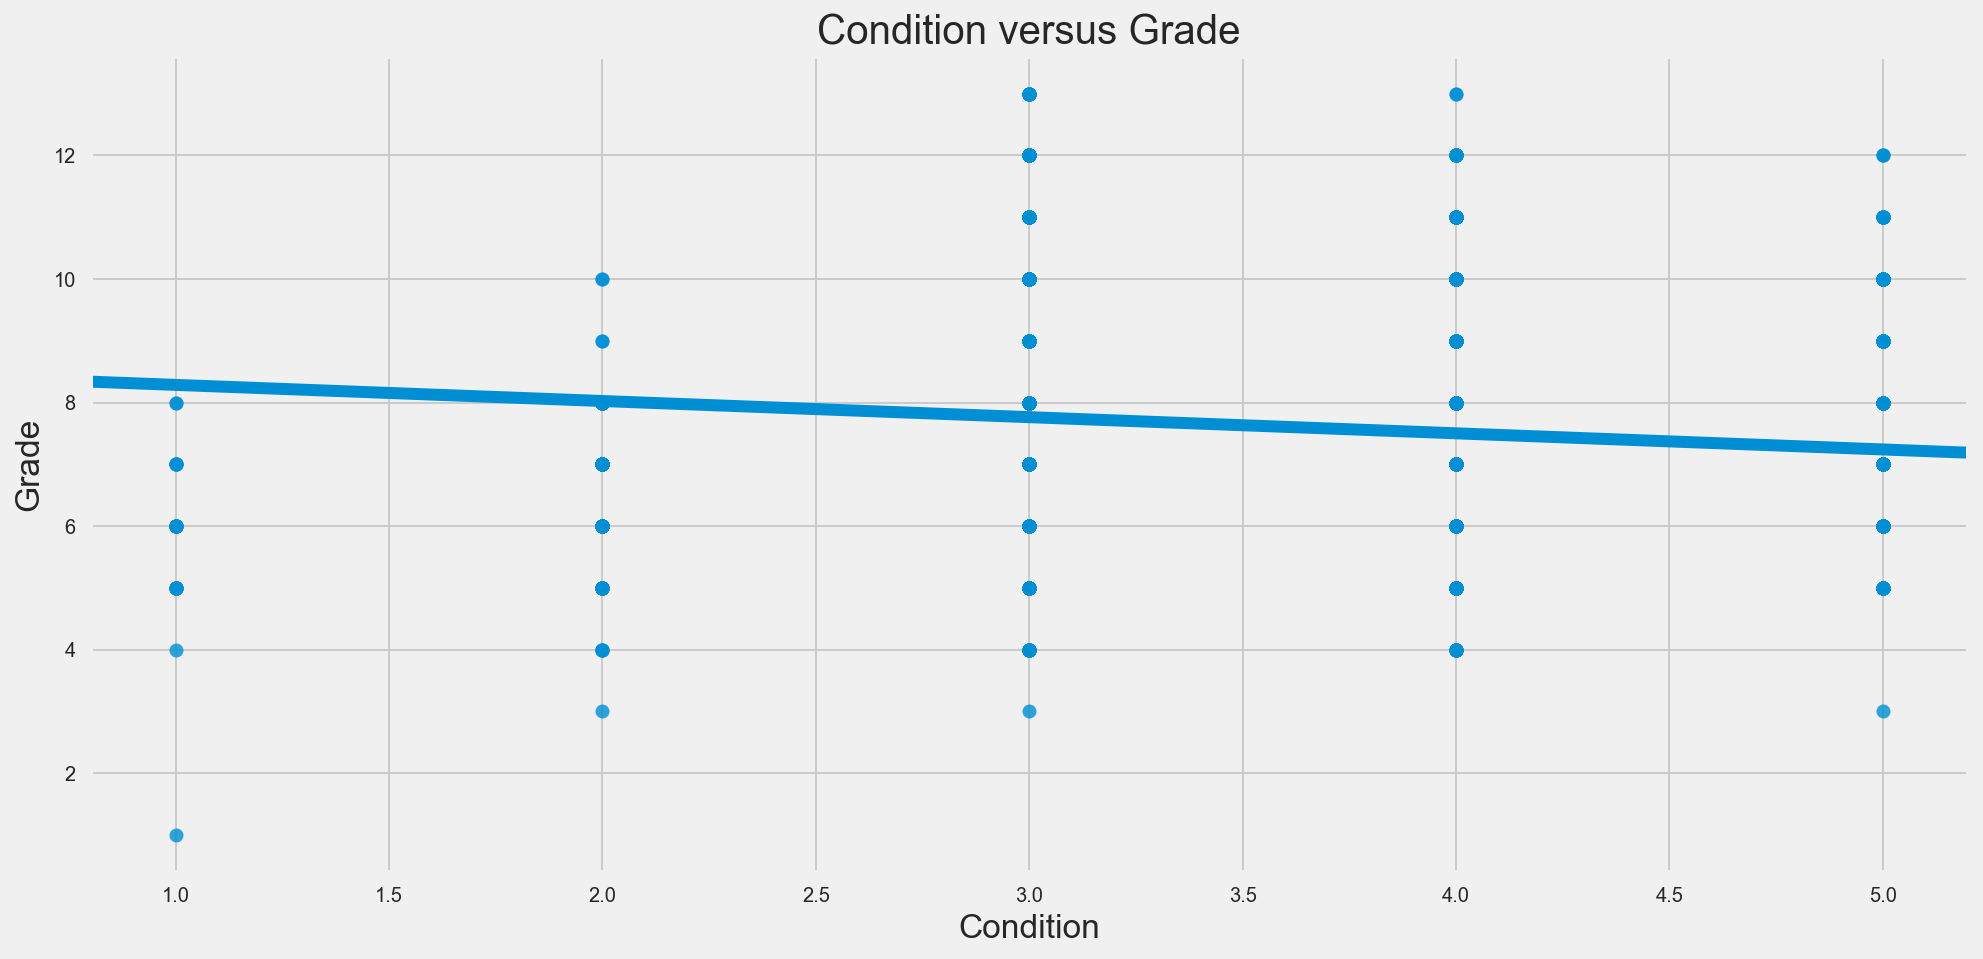

In [0]:
#Scatter plot to check for any correlation between House Condition and grade
plt.style.use('fivethirtyeight')
plt.figure(figsize = (15,7))
sns.regplot(df_house['condition'],df_house['grade'])
plt.ylabel('Grade')
plt.xlabel('Condition')
plt.title('Condition versus Grade')
plt.show()

#### d) Is price affected by number of bathrooms?

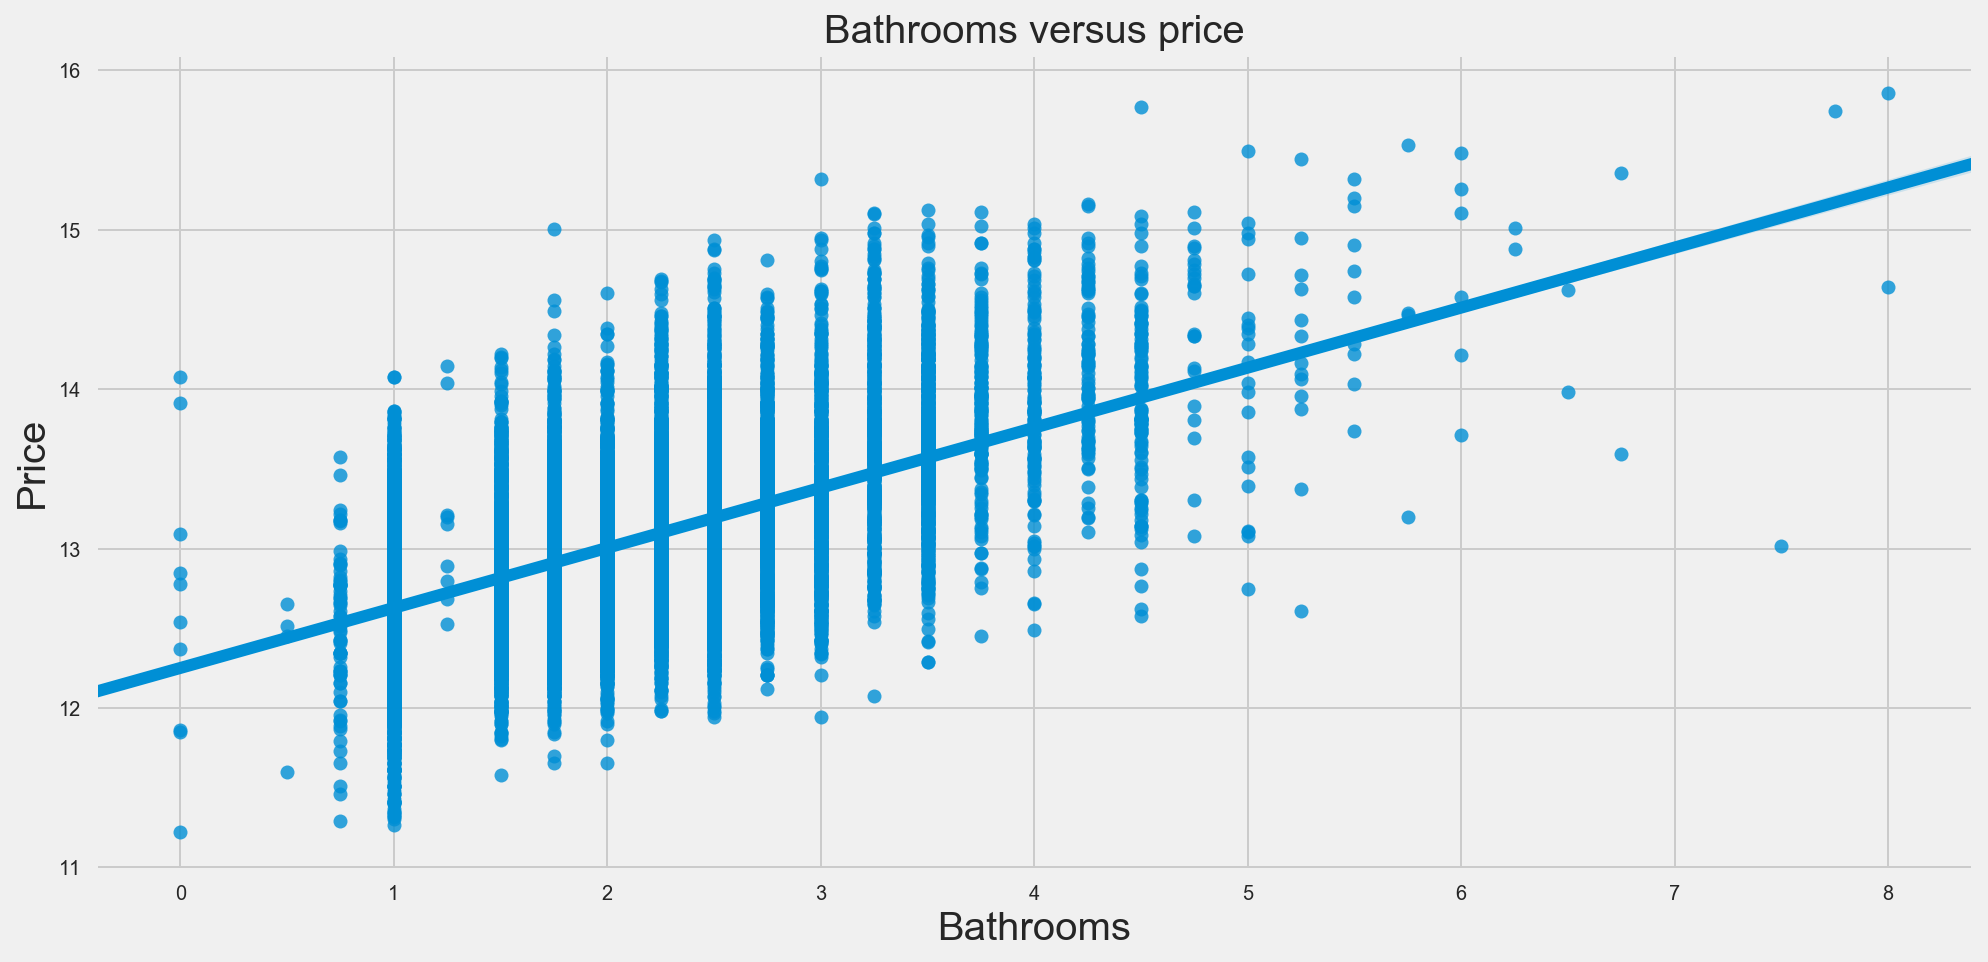

In [0]:
#Scatter plot to check for any correlation between bathrooms and Price
plt.style.use('fivethirtyeight')
plt.figure(figsize = (15,7))
sns.regplot(df_house['bathrooms'],df_house['price'])
plt.ylabel('Price',fontsize = 20)
plt.xlabel('Bathrooms',fontsize = 20)
plt.title('Bathrooms versus price',fontsize = 20)
plt.show()

Increase in bathrooms has a positive correlation with price

#### e) Is price affected by floor?

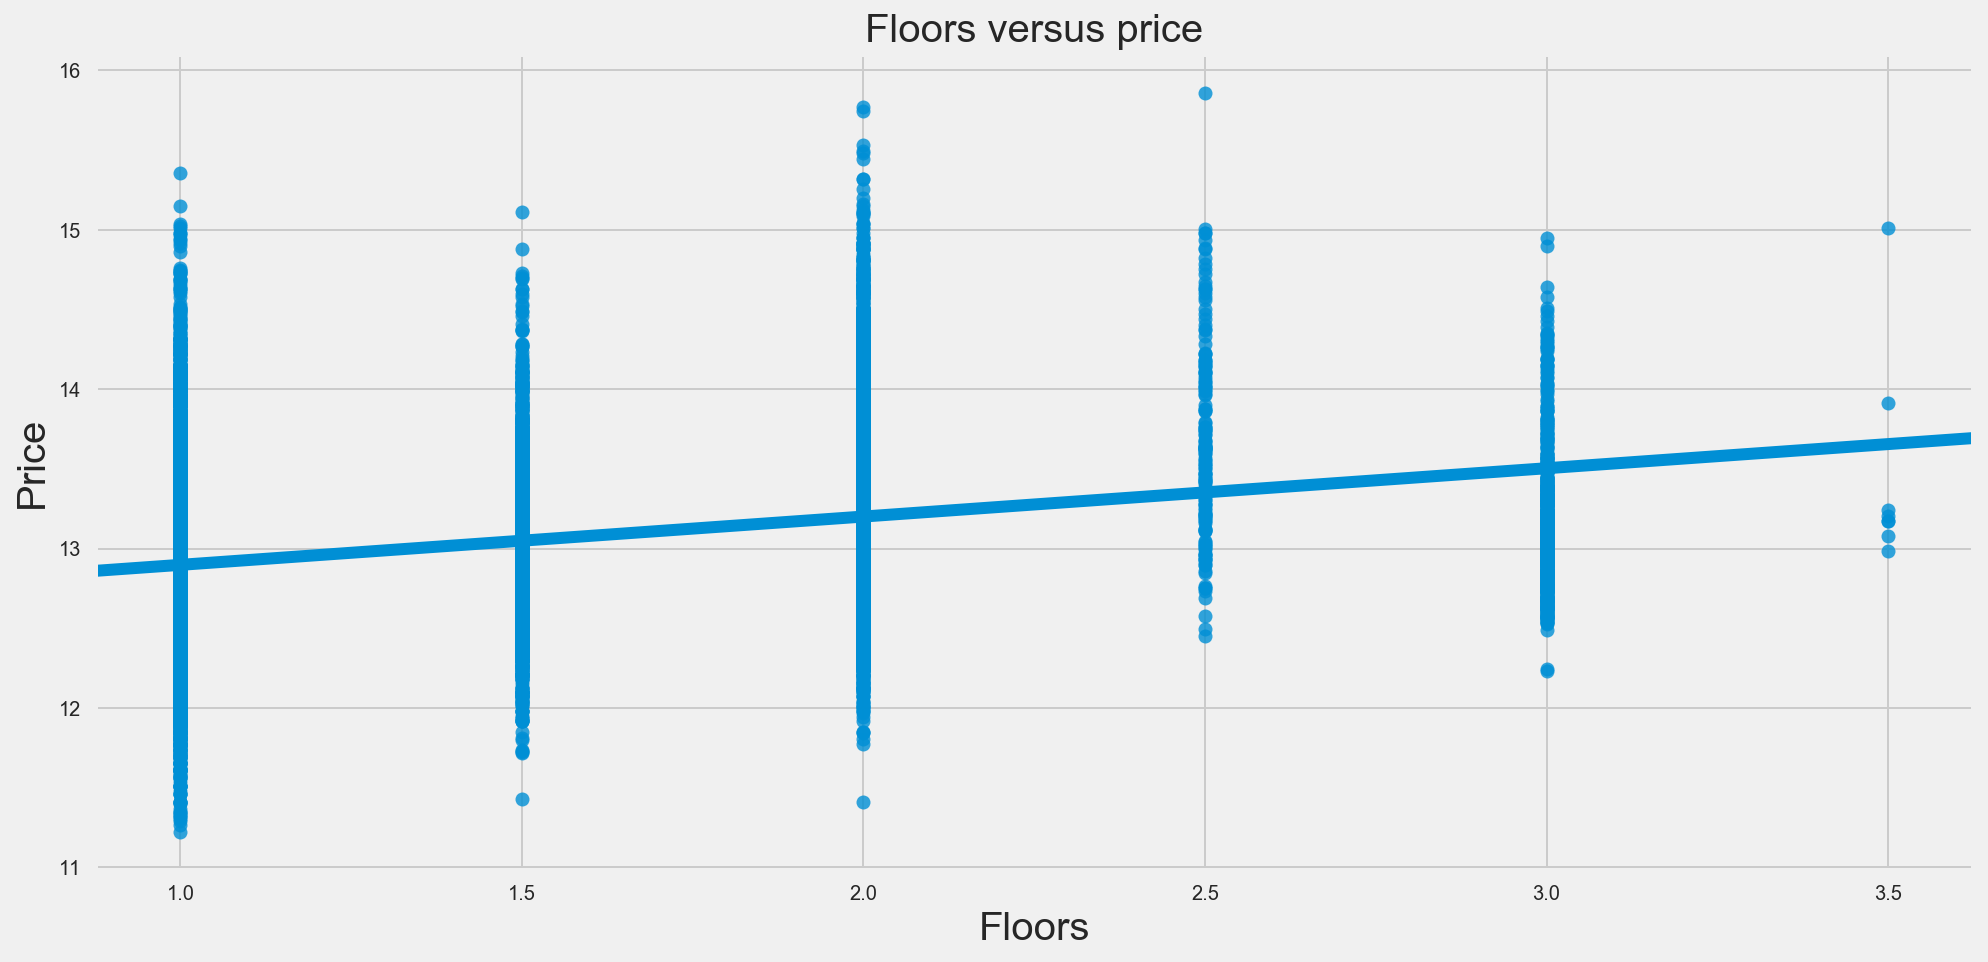

In [0]:
#Scatter plot to check for any correlation between floors and Price
plt.style.use('fivethirtyeight')
plt.figure(figsize = (15,7))
sns.regplot(df_house['floors'],df_house['price'])
plt.ylabel('Price',fontsize = 20)
plt.xlabel('Floors',fontsize = 20)
plt.title('Floors versus price',fontsize = 20)
plt.show()

Marginal increase in price as proce increases. 
There is need to interrogate the data source/originators to understand why there is 1.5, 2.5 and 3.5 floor counts which is contrally to standard reasoning where floor numbers are whole numbers only.

#### f) What is the distribution of bathrooms versus bedrooms?

In [0]:
pd.crosstab(df_house['bedrooms'], df_house['bathrooms'])

bathrooms,0.0,0.5,0.75,1.0,1.25,1.5,1.75,2.0,2.25,2.5,...,5.25,5.5,5.75,6.0,6.25,6.5,6.75,7.5,7.75,8.0
bedrooms,,,,,,,,,,,,,,,,,,,,,
0,7,0,1,1,0,1,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
1,3,1,27,138,2,12,4,6,4,2,...,0,0,0,0,0,0,0,0,0,0
2,0,2,26,1558,3,294,304,216,118,197,...,0,0,0,0,0,0,0,0,0,0
3,0,0,16,1780,4,829,1870,1048,1082,2357,...,0,0,0,0,0,0,0,0,0,0
4,0,1,2,325,0,254,719,525,709,2502,...,5,5,1,0,0,0,0,0,0,0
5,0,0,0,43,0,48,134,110,116,287,...,4,4,2,4,2,1,1,0,0,0
6,0,0,0,6,0,6,16,24,15,29,...,3,0,0,1,0,1,0,0,1,1
7,0,0,0,1,0,2,0,0,3,2,...,0,1,1,0,0,0,1,0,0,1
8,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


g) Do some zipcodes have bigger houses than the rest?

In [0]:
#Zipcode versus house features
df_house.pivot_table(['bathrooms', 'bedrooms','sqft_living'], ['zipcode'], aggfunc='mean').sample(10)

,bathrooms,bedrooms,sqft_living
zipcode,,,
98136,1.865,2.932,1726.829
98006,2.556,3.841,2888.295
98039,3.200,4.060,3800.900
98023,2.062,3.425,1989.729
98105,2.159,3.581,2150.576
98103,1.935,3.060,1650.831
98040,2.716,4.028,3106.833
98034,2.123,3.468,1978.657
98058,2.100,3.523,2049.631


The house features seem to be fairly distributed across most zipcodes with no extreme averages.

### 3.4 Correlation

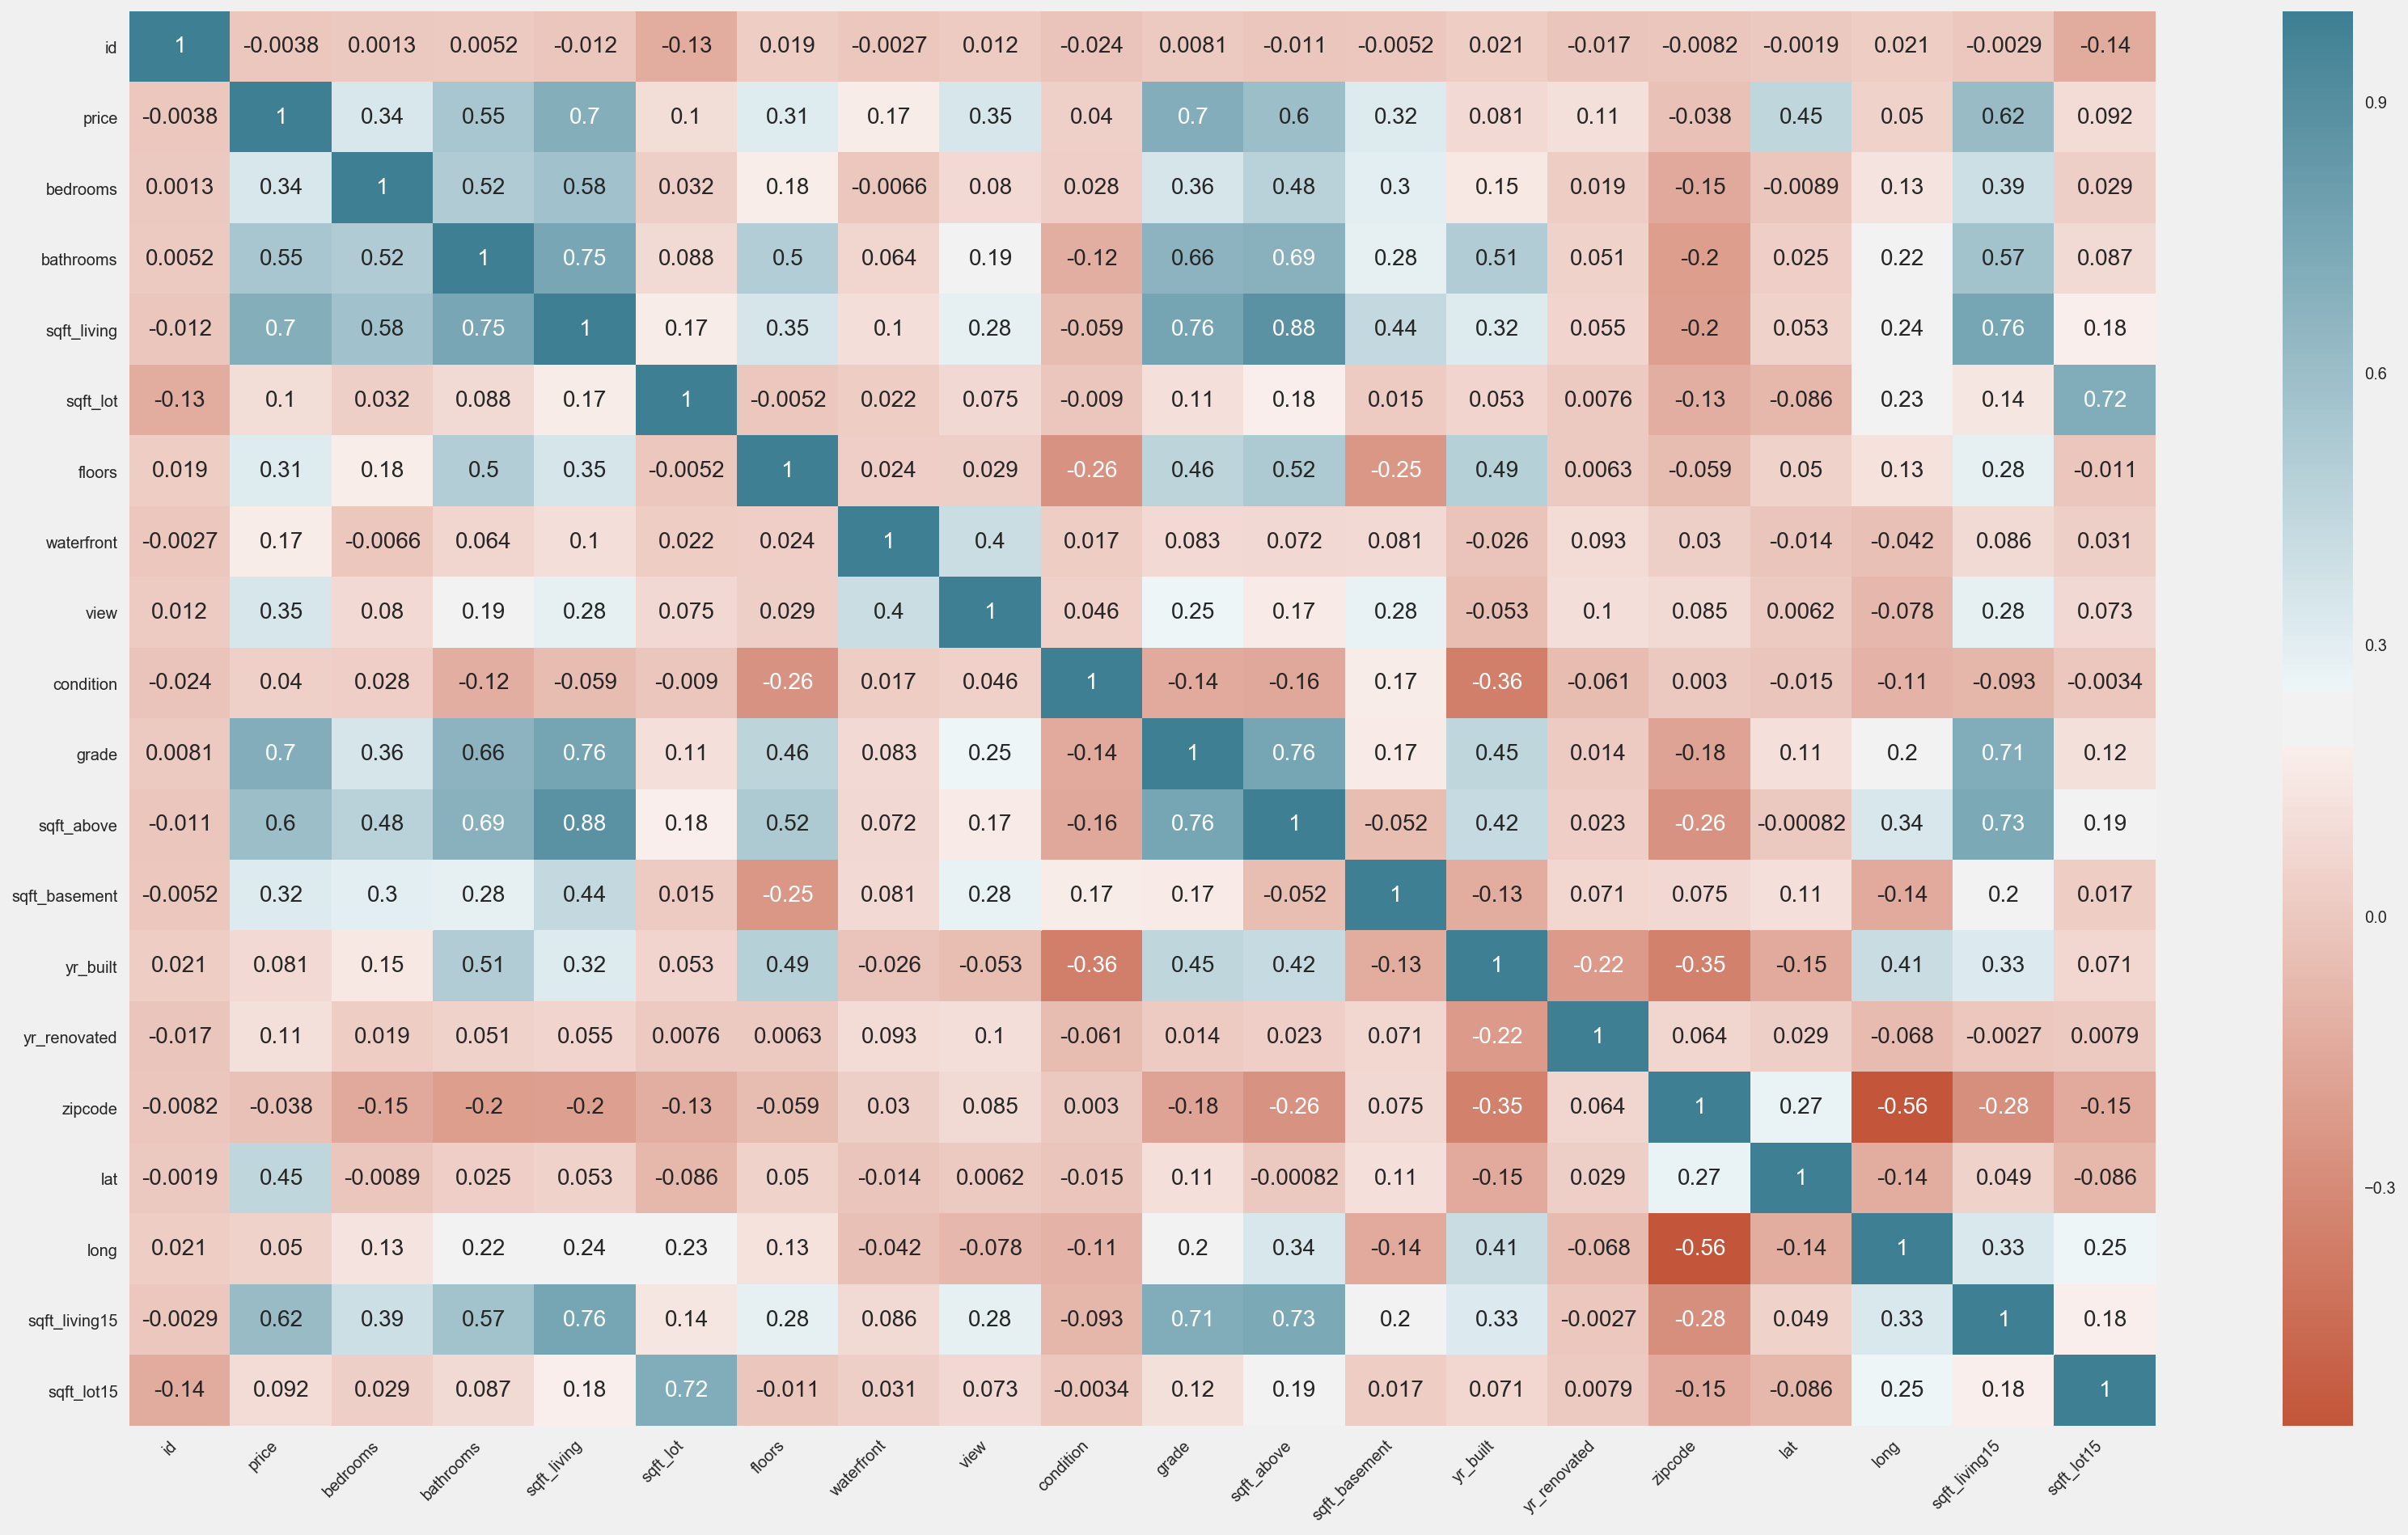

In [0]:
# Correlation 
plt.figure(figsize = (25,15))
ax = sns.heatmap(df_house.corr(),cmap=sns.diverging_palette(20, 220, n=256), annot = True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right');
plt.show()

Observations.
- Price has strong positive correlation with sqft_living,grade,sqft_above, sqft_living15, bathrooms
- Price has weak correlation with sqft_lot, yr_built, yr, renovated, zip code,longitude and sqft_lot15,view waterfront, view

## Data Preparation

### Label Encoding: Change all String Columns to Integers

In [4]:
# Instantiate Label Encoder.
label_encoder = preprocessing.LabelEncoder() 
# Loop through all object columns and change them to numeric
for i in range(0,df.shape[1]):
    if df.dtypes[i]=='object':
        df[df.columns[i]] = label_encoder.fit_transform(df[df.columns[i]])

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
status                       3163 non-null int64
age                          3163 non-null int64
sex                          3163 non-null int64
on_thyroxine                 3163 non-null int64
query_on_thyroxine           3163 non-null int64
on_antithyroid_medication    3163 non-null int64
thyroid_surgery              3163 non-null int64
query_hypothyroid            3163 non-null int64
query_hyperthyroid           3163 non-null int64
pregnant                     3163 non-null int64
sick                         3163 non-null int64
tumor                        3163 non-null int64
lithium                      3163 non-null int64
goitre                       3163 non-null int64
TSH_measured                 3163 non-null int64
TSH                          3163 non-null int64
T3_measured                  3163 non-null int64
T3                           3163 non-null int64
TT4_measure

#### a) Drop null values

No values to be dropped

#### b) Drop non-required columns

In [0]:
df_house.drop(['id'],axis =1, inplace =True)

#### b) Normalize target variable

Price normalized in 3.0 above after univariate distribution showed abnormal distribution

## Modelling

### Split the independent and dependent variables

In [5]:
# We want to predict if one has hypothyroid or not so dependent variable is status. 
# 1 means has disease and 0 has no disease
y = df['status'].values
x_features = ['age', 'sex', 'on_thyroxine', 'query_on_thyroxine','on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid','query_hyperthyroid', 'pregnant', 'sick', 
              'tumor', 'lithium', 'goitre','TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4','T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG']
X = df[x_features].values

# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Apply Random Forest Classifier

#### a) Random Forest Training and Prediction

In [6]:
# Instantiate the model and provide hyperparameters such as min_samples_split or max_depth
forest = RandomForestRegressor(n_estimators = 100, random_state=42, min_samples_split = 20, max_depth=5)
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)

comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()

,Actual,Predicted
count,633.000,633.000
mean,0.942,0.948
std,0.235,0.156
min,0.000,0.043
25%,1.000,0.986
50%,1.000,1.000
75%,1.000,1.000
max,1.000,1.000


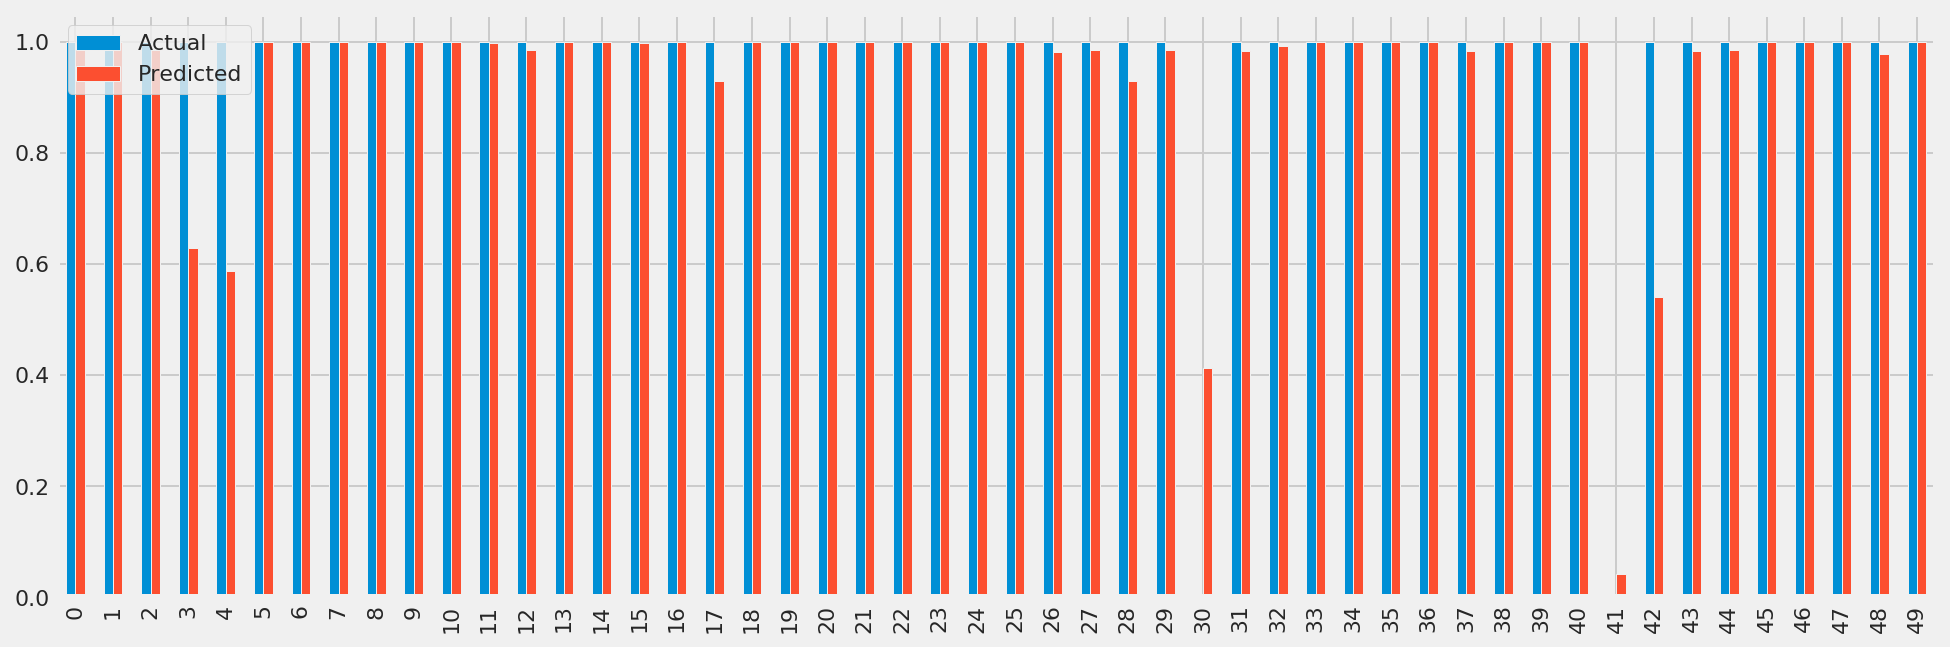

In [26]:
## Print Actual versus Predicted Results
plt.style.use('fivethirtyeight')
df_actual_pred = pd.DataFrame({"Actual":np.array(y_test),"Predicted":y_pred})
df_actual_pred[:50].plot(figsize=(15,5),kind='bar')
plt.show()

#### b) Model Results

In [7]:
## Model Results: Errors and Score
rf_meanAbsError=round(mean_absolute_error(np.array(y_test),y_pred),2)
rf_meanSqrdError=round(mean_squared_error(np.array(y_test),y_pred),2)
rf_rootMeanSqrdError=round(np.sqrt(rf_meanSqrdError),2)

print("Random Forest R2 score is ",round(r2_score(y_test, y_pred),4))

print("Mean Absolute Error=",rf_meanAbsError)
print("Mean Squared Error=",rf_meanSqrdError)
print("Root Mean Squared Error=",rf_rootMeanSqrdError)

Random Forest R2 score is  0.5879
Mean Absolute Error= 0.05
Mean Squared Error= 0.02
Root Mean Squared Error= 0.14


#### c) Tree output

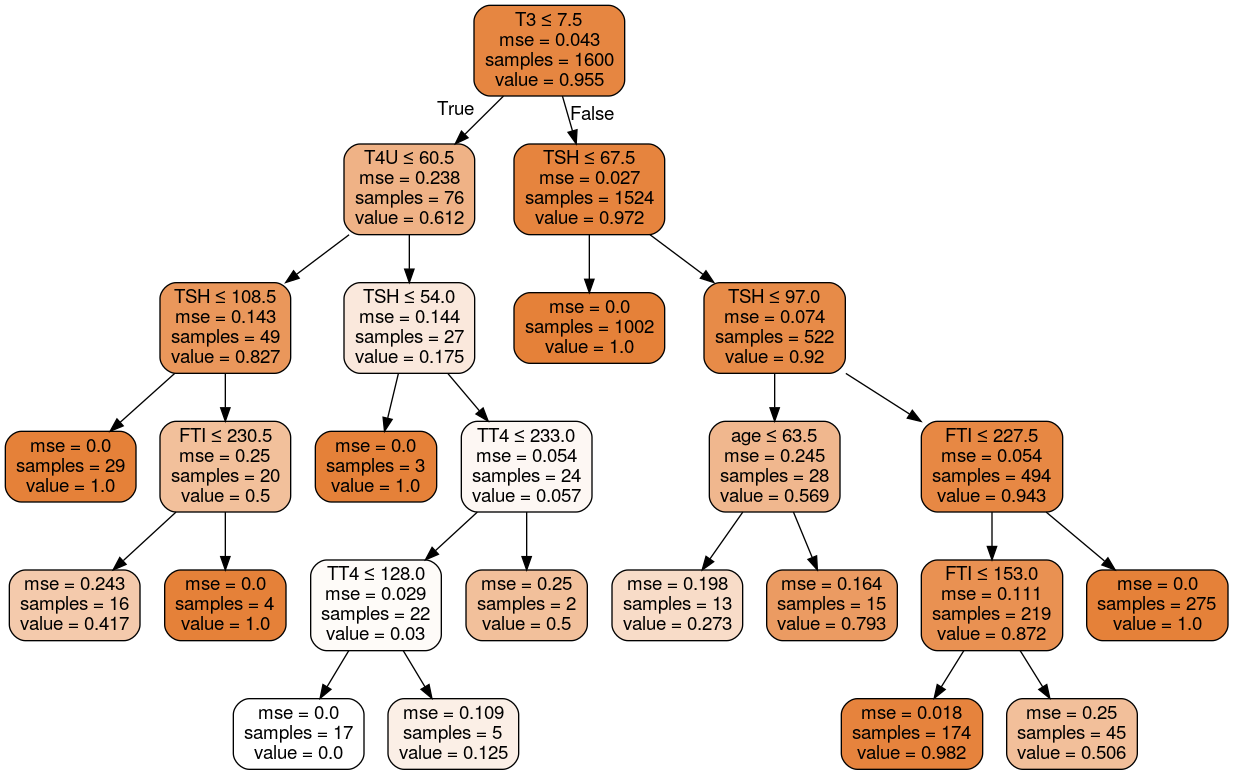

In [17]:
## Check the performance of sample tree output
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest
tree = forest.estimators_[50]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = x_features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('absenteism_forest.png')
Image(graph.create_png())


#### d) Feature Importance

In [18]:
# Get numerical feature importances
importances = list(tree.feature_importances_)

# We now use some Python magic to connect each feature with its importance
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(x_features, importances)]

print(feature_importances) #this already has all the information we need, but it can be tricky to see when there are too many features.
print()

# Nice to have: We can sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

[('age', 0.05), ('sex', 0.0), ('on_thyroxine', 0.0), ('query_on_thyroxine', 0.0), ('on_antithyroid_medication', 0.0), ('thyroid_surgery', 0.0), ('query_hypothyroid', 0.0), ('query_hyperthyroid', 0.0), ('pregnant', 0.0), ('sick', 0.0), ('tumor', 0.0), ('lithium', 0.0), ('goitre', 0.0), ('TSH_measured', 0.0), ('TSH', 0.28), ('T3_measured', 0.0), ('T3', 0.22), ('TT4_measured', 0.0), ('TT4', 0.01), ('T4U_measured', 0.0), ('T4U', 0.17), ('FTI_measured', 0.0), ('FTI', 0.27), ('TBG_measured', 0.0), ('TBG', 0.0)]

Variable: TSH                  Importance: 0.28
Variable: FTI                  Importance: 0.27
Variable: T3                   Importance: 0.22
Variable: T4U                  Importance: 0.17
Variable: age                  Importance: 0.05
Variable: TT4                  Importance: 0.01
Variable: sex                  Importance: 0.0
Variable: on_thyroxine         Importance: 0.0
Variable: query_on_thyroxine   Importance: 0.0
Variable: on_antithyroid_medication Importance: 0.0
Variabl

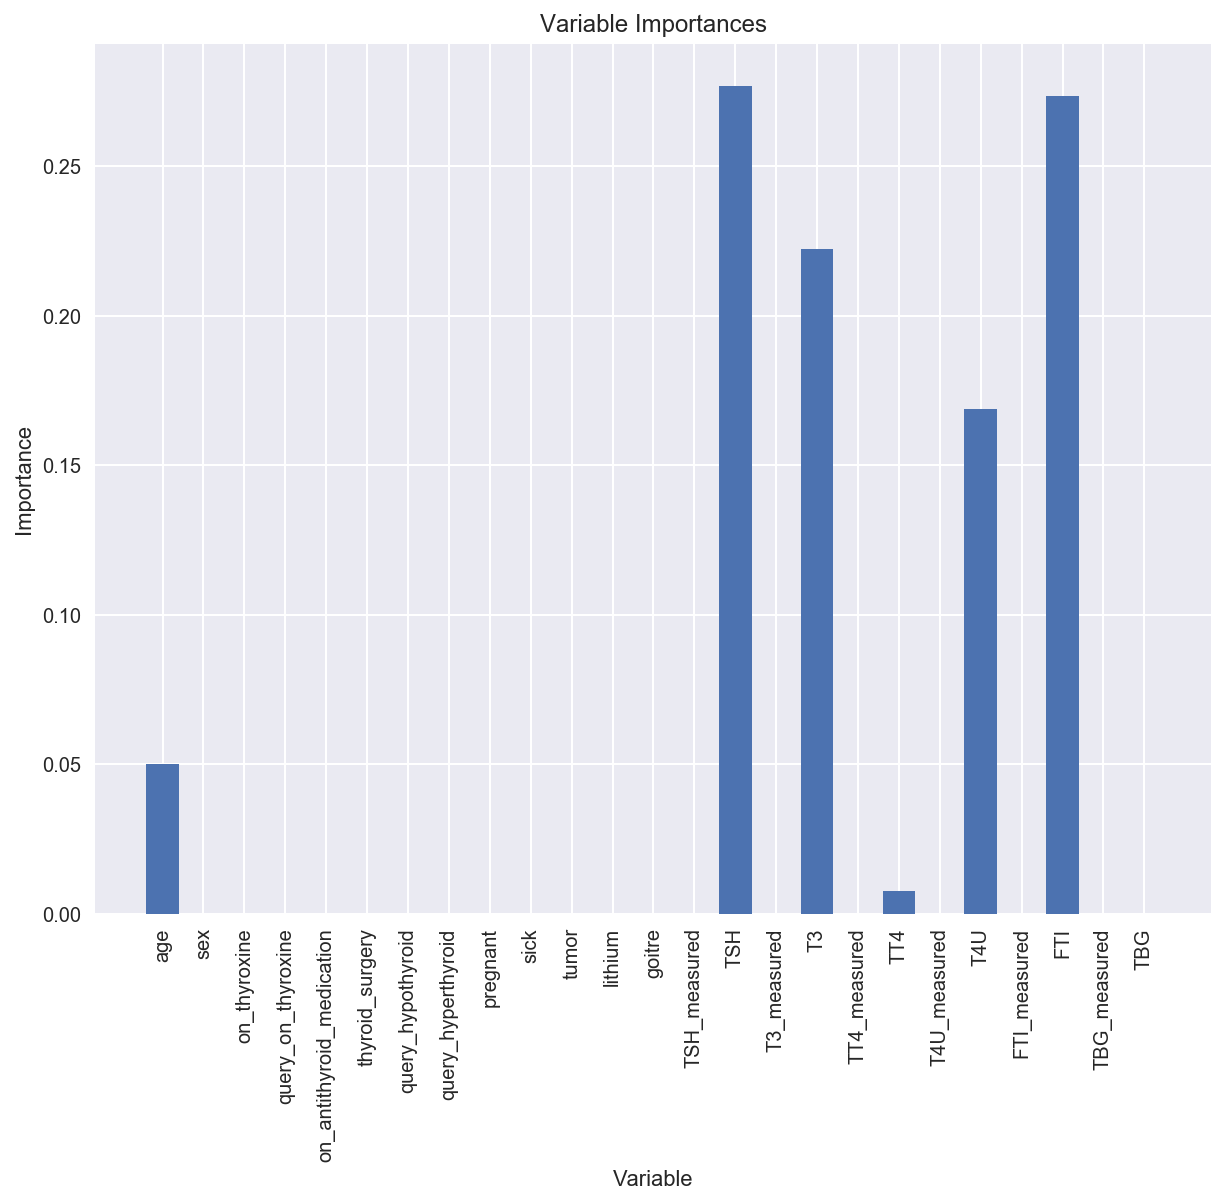

In [19]:
#Visual representation of importance
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, x_features, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

**Model Assessment**
How accurate is the model you've created? What parameters have you used to tweak it?
What can you conclude about the fit of your model?




### AdaBoost Regression



#### AdaBoost training and prediction

In [25]:
# Note that adaboost needs a simple decision tree in its constructor. Again, tweak the max_depth and see how it influences the process
ada_boost = AdaBoostRegressor(DecisionTreeRegressor(max_depth=7),
                          n_estimators=40, random_state=42)

ada_boost = ada_boost.fit(X_train, y_train)
y_pred_ada = ada_boost.predict(X_test)

#### Adaboost Results

In [31]:
## Model Results: Errors and Score
adb_meanAbsError=round(mean_absolute_error(np.array(y_test),y_pred_ada),2)
adb_meanSqrdError=round(mean_squared_error(np.array(y_test),y_pred_ada),2)
adb_rootMeanSqrdError=round(np.sqrt(adb_meanSqrdError),2)

print("Random Forest R2 score is ",round(r2_score(y_test, y_pred_ada),4))

print("Mean Absolute Error=",adb_meanAbsError)
print("Mean Squared Error=",adb_meanSqrdError)
print("Root Mean Squared Error=",adb_rootMeanSqrdError)

Random Forest R2 score is  0.6882
Mean Absolute Error= 0.03
Mean Squared Error= 0.02
Root Mean Squared Error= 0.14


#### Adaboost Observations

### Gradient Boosting Regressor

#### Gradient boosting training and prediction

In [85]:
from sklearn.ensemble import GradientBoostingRegressor
target_number_of_trees = 400

gbr = GradientBoostingRegressor(n_estimators=target_number_of_trees, learning_rate=0.1, max_depth=8)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)

#### Gradient Boosting results

In [88]:
## Model Results: Errors and Score
gbr_meanAbsError=round(mean_absolute_error(np.array(y_test),y_pred_gbr),2)
gbr_meanSqrdError=round(mean_squared_error(np.array(y_test),y_pred_gbr),2)
gbr_rootMeanSqrdError=round(np.sqrt(gbr_meanSqrdError),2)

print("Random Forest R2 score is ",round(r2_score(y_test, y_pred_gbr),4))

print("Mean Absolute Error=",gbr_meanAbsError)
print("Mean Squared Error=",gbr_meanSqrdError)
print("Root Mean Squared Error=",gbr_rootMeanSqrdError)

Random Forest R2 score is  0.7513
Mean Absolute Error= 0.02
Mean Squared Error= 0.01
Root Mean Squared Error= 0.1


### Support Vector Machine Regression

#### Training and Predicting

In [96]:
throid_model = SVC(kernel = 'linear')

# Train the model using the training set
throid_model.fit(X_train,y_train)

# Predict the response for the test set
y_pred = throid_model.predict(X_test)

#### Results

In [97]:
## Model Results: Errors and Score
gbr_meanAbsError=round(mean_absolute_error(np.array(y_test),y_pred_gbr),2)
gbr_meanSqrdError=round(mean_squared_error(np.array(y_test),y_pred_gbr),2)
gbr_rootMeanSqrdError=round(np.sqrt(gbr_meanSqrdError),2)

print("Random Forest R2 score is ",round(r2_score(y_test, y_pred_gbr),4))

print("Mean Absolute Error=",gbr_meanAbsError)
print("Mean Squared Error=",gbr_meanSqrdError)
print("Root Mean Squared Error=",gbr_rootMeanSqrdError)

Random Forest R2 score is  0.7513
Mean Absolute Error= 0.02
Mean Squared Error= 0.01
Root Mean Squared Error= 0.1


#### Observations

## Model Tuning

1 First run with no finetuning

a) MLR baseline R squared score of 68.93% achieved with all Y as independent and all others as dependent.

b) Rige R squared score of 71% achieved

c) Lasso R squared score of 71% achieved

2 Creation of new features building age and total space

No notable improvement in the model

3.Normalization of price to ensure it's normal.

This was done using log transformation. After normalization, model improved by baseline of 10%

a) MLR baseline R squared score of 76% achieved with all Y as independent and all others as dependent.

b) Ridge R squared score of 77% achieved

c) Lasso R squared score of 77% achieved


4 Removal of columns with multicollineality.

Removing the columns such as zip and lat long and space columns which have multicolleaniality makes the model's accuracy even lower. Hence these were not removed. Nevertheless, Lasso model is able to perform variable selection of which the multilinear columns were observed to have their coefficients reduced to zero.


## Model Evaluation

#### R2 Scores for the models are as below
Multiple Linear Regression - 76.69%

Ridge - 54% on Q3

Ridge - 77.1%

Lasso - 77.1%

Elastic net Regression - 77.03%

#### Recommendation:  We recommend adoption of Lasso regression due to simplicity of the model. 
It has minimized bathrooms, lattitude, sqft_living15 to zero hence simplifying the model.
Lasso score is at par with Ridge and Elastic search.

#### Future Enhancements

Consider dropping the extreme outliers e.g in price, bedrooms(33) and reprocess the models for enhanced accuracy.